# Import Data

In [1]:
import pandas as pd
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',10)
df= pd.read_excel('SKU.xls')
df

,ProductCode,PlantCode,Date,Red,Yellow,MaxStock,Green,ATP+GIT,ATP,ATP+GIT+IBT
0,FFW002013-0020,ZA03,2022-07-16,5,22,14,27,70,70,70
1,FFW002013-0020,ZA03,2022-07-17,5,22,14,27,70,70,70
2,FFW002013-0020,ZA03,2022-07-18,5,22,14,27,70,70,70
3,FFW002013-0020,ZA03,2022-07-19,5,22,14,27,70,70,70
4,FFW002013-0020,ZA03,2022-07-20,5,22,14,27,70,70,70
...,...,...,...,...,...,...,...,...,...,...
62760,X000038-0005,ZA03,2022-08-29,51,82,67,457,66,66,188
62761,X000038-0005,ZA03,2022-08-30,51,82,67,457,66,66,188
62762,X000038-0005,ZA03,2023-01-12,51,92,72,454,130,130,252
62763,X000038-0005,ZA03,2022-10-11,51,82,67,457,45,45,167


# Add stock health zones

In [2]:
# looking at the ATP values and checking against the zones to determine which zone the product is in

import numpy as np

#define conditions
conditions = [
    (df['ATP'] >df['Green']),
    (df['ATP'] > df['Red']) & (df['ATP'] <= df['Yellow']),
    (df['ATP'] > df['Yellow']) & (df['ATP'] <= df['Green']),
    (df['ATP'] <=0),
    (df['ATP'] <=df['Red'])
]

#define results
results = ['Blue', 'Yellow', 'Green', 'Dark Red','Red']

#create new column based on conditions in column1 and column2
df['Stock_Level'] = np.select(conditions, results)
pd.set_option('display.max_rows', 50)
df

,ProductCode,PlantCode,Date,Red,Yellow,MaxStock,Green,ATP+GIT,ATP,ATP+GIT+IBT,Stock_Level
0,FFW002013-0020,ZA03,2022-07-16,5,22,14,27,70,70,70,Blue
1,FFW002013-0020,ZA03,2022-07-17,5,22,14,27,70,70,70,Blue
2,FFW002013-0020,ZA03,2022-07-18,5,22,14,27,70,70,70,Blue
3,FFW002013-0020,ZA03,2022-07-19,5,22,14,27,70,70,70,Blue
4,FFW002013-0020,ZA03,2022-07-20,5,22,14,27,70,70,70,Blue
...,...,...,...,...,...,...,...,...,...,...,...
62760,X000038-0005,ZA03,2022-08-29,51,82,67,457,66,66,188,Yellow
62761,X000038-0005,ZA03,2022-08-30,51,82,67,457,66,66,188,Yellow
62762,X000038-0005,ZA03,2023-01-12,51,92,72,454,130,130,252,Green
62763,X000038-0005,ZA03,2022-10-11,51,82,67,457,45,45,167,Red


# Stock_Level_Plan Health Zones

In [3]:
# as above but now doing it using the plan line (ATP+GIT+IBT) and not the actual stock line

import numpy as np

#define conditions
conditions = [
    (df['ATP+GIT+IBT'] >df['Green']),
    (df['ATP+GIT+IBT'] > df['Red']) & (df['ATP+GIT+IBT'] <= df['Yellow']),
    (df['ATP+GIT+IBT'] > df['Yellow']) & (df['ATP+GIT+IBT'] <= df['Green']),
    (df['ATP+GIT+IBT'] <=0),
    (df['ATP+GIT+IBT'] <=df['Red'])
]

#define results
results = ['Blue', 'Yellow', 'Green', 'Dark Red','Red']

#create new column based on conditions in column1 and column2
df['Stock_Level_Plan'] = np.select(conditions, results)
pd.set_option('display.max_rows', 50)
df

,ProductCode,PlantCode,Date,Red,Yellow,MaxStock,Green,ATP+GIT,ATP,ATP+GIT+IBT,Stock_Level,Stock_Level_Plan
0,FFW002013-0020,ZA03,2022-07-16,5,22,14,27,70,70,70,Blue,Blue
1,FFW002013-0020,ZA03,2022-07-17,5,22,14,27,70,70,70,Blue,Blue
2,FFW002013-0020,ZA03,2022-07-18,5,22,14,27,70,70,70,Blue,Blue
3,FFW002013-0020,ZA03,2022-07-19,5,22,14,27,70,70,70,Blue,Blue
4,FFW002013-0020,ZA03,2022-07-20,5,22,14,27,70,70,70,Blue,Blue
...,...,...,...,...,...,...,...,...,...,...,...,...
62760,X000038-0005,ZA03,2022-08-29,51,82,67,457,66,66,188,Yellow,Green
62761,X000038-0005,ZA03,2022-08-30,51,82,67,457,66,66,188,Yellow,Green
62762,X000038-0005,ZA03,2023-01-12,51,92,72,454,130,130,252,Green,Green
62763,X000038-0005,ZA03,2022-10-11,51,82,67,457,45,45,167,Red,Green


# Add packsize code column 

In [4]:
# get packsize code column

df['Pack_Code'] = df['ProductCode'].str[-4:] # last 4 letters of the productCode to get the pack code
pd.set_option('display.max_rows', 5)
df

,ProductCode,PlantCode,Date,Red,Yellow,MaxStock,Green,ATP+GIT,ATP,ATP+GIT+IBT,Stock_Level,Stock_Level_Plan,Pack_Code
0,FFW002013-0020,ZA03,2022-07-16,5,22,14,27,70,70,70,Blue,Blue,0020
1,FFW002013-0020,ZA03,2022-07-17,5,22,14,27,70,70,70,Blue,Blue,0020
...,...,...,...,...,...,...,...,...,...,...,...,...,...
62763,X000038-0005,ZA03,2022-10-11,51,82,67,457,45,45,167,Red,Green,0005
62764,X000038-0005,ZA03,2022-09-22,51,82,67,457,46,46,168,Red,Green,0005


# Extract date and time from date column

In [5]:
# Get the month and year and seperate into new columns - will use this to work out sale per month and reds per month
df['Year'] = df['Date'].dt.year 
df['Month'] = df['Date'].dt.month 
df


,ProductCode,PlantCode,Date,Red,Yellow,MaxStock,Green,ATP+GIT,ATP,ATP+GIT+IBT,Stock_Level,Stock_Level_Plan,Pack_Code,Year,Month
0,FFW002013-0020,ZA03,2022-07-16,5,22,14,27,70,70,70,Blue,Blue,0020,2022,7
1,FFW002013-0020,ZA03,2022-07-17,5,22,14,27,70,70,70,Blue,Blue,0020,2022,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62763,X000038-0005,ZA03,2022-10-11,51,82,67,457,45,45,167,Red,Green,0005,2022,10
62764,X000038-0005,ZA03,2022-09-22,51,82,67,457,46,46,168,Red,Green,0005,2022,9


# Find original pack codes in the pack code column

In [6]:
# determine original values in the pack code column
print(df.Pack_Code.unique().tolist())

['0020', '0045', '0755', '0023', '0005', '0200', '0235', '0088', '0001', '0025', '7219', '0024', '0048', '0418', '7213', '0192', '0010', '0500', '0006', '5005', '5010']


# Convert Pack codes to volumes and add a new column

In [7]:
# Create column with packsizes(volumes) based on packcodes

import numpy as np

#define conditions
conditions = [
    (df['Pack_Code'] == '0020'),
    (df['Pack_Code'] == '0045'),
    (df['Pack_Code'] == '0755'),
    (df['Pack_Code'] == '0023'),
    (df['Pack_Code'] == '0005'),
    (df['Pack_Code'] == '0200'),
    (df['Pack_Code'] == '0235'),
    (df['Pack_Code'] == '0088'),
    (df['Pack_Code'] == '0001'),
    (df['Pack_Code'] == '0025'),
    (df['Pack_Code'] == '7219'),
    (df['Pack_Code'] == '0024'),
    (df['Pack_Code'] == '0048'),
    (df['Pack_Code'] == '0418'),
    (df['Pack_Code'] == '7213'),
    (df['Pack_Code'] == '0192'),
    (df['Pack_Code'] == '0010'),
    (df['Pack_Code'] == '0500'),
    (df['Pack_Code'] == '0006'),
    (df['Pack_Code'] == '5005'),
    (df['Pack_Code'] == '5010')
    
]

#define results
results = [20, 4.5, 4.7, 22.5,5,200,23.5,3.4,1,25,10,24,4.8,4.12,2,192,10,0.5,6,5,10]

#create new column based on conditions in column1 and column2
df['Volume'] = np.select(conditions, results)
pd.set_option('display.max_rows', 50)
df

,ProductCode,PlantCode,Date,Red,Yellow,MaxStock,Green,ATP+GIT,ATP,ATP+GIT+IBT,Stock_Level,Stock_Level_Plan,Pack_Code,Year,Month,Volume
0,FFW002013-0020,ZA03,2022-07-16,5,22,14,27,70,70,70,Blue,Blue,0020,2022,7,20.0
1,FFW002013-0020,ZA03,2022-07-17,5,22,14,27,70,70,70,Blue,Blue,0020,2022,7,20.0
2,FFW002013-0020,ZA03,2022-07-18,5,22,14,27,70,70,70,Blue,Blue,0020,2022,7,20.0
3,FFW002013-0020,ZA03,2022-07-19,5,22,14,27,70,70,70,Blue,Blue,0020,2022,7,20.0
4,FFW002013-0020,ZA03,2022-07-20,5,22,14,27,70,70,70,Blue,Blue,0020,2022,7,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62760,X000038-0005,ZA03,2022-08-29,51,82,67,457,66,66,188,Yellow,Green,0005,2022,8,5.0
62761,X000038-0005,ZA03,2022-08-30,51,82,67,457,66,66,188,Yellow,Green,0005,2022,8,5.0
62762,X000038-0005,ZA03,2023-01-12,51,92,72,454,130,130,252,Green,Green,0005,2023,1,5.0
62763,X000038-0005,ZA03,2022-10-11,51,82,67,457,45,45,167,Red,Green,0005,2022,10,5.0


# Rename columns to match so that left join is possible

In [8]:
# do a left join to get the additional column data from the stock health dump - similar to vlookup
# When doing this have to make sure that the right table has all duplicates removed
# check if done correctly by making sure that the table sizes match

# import pandas
import pandas as pd
pd.set_option('display.max_rows', 50)
# read csv data for the stock health dump
df2 = pd.read_csv('Stock_Health_Dump(17Jan2023).csv',sep = ',',low_memory=False)

# rename the Code column to match the productCode column in the first dataframe of the SKU data
df.rename(columns = {'ProductCode':'Code'}, inplace = True)

df2

,Stream,SFG,Prod Site,Plant,Code,ABC,Red,Yellow,Green,EBQ|MOQ,MAX Stock,ADU,ATP,ATP Health,ATP+GIT,ATP+GIT Health,ATP+GIT+PLAN,ATP+GIT+PLAN Health,Plan TOG Gap,ATP Days Cover,Plan Days Cover,TOG Days Cover,POPK Units,POPK Count
0,ZA03_EB_EBM,FPR000001,ZA03,ZA03,FPR000001-0001,C,166,328,668,2128,247,7.72,338,50.60%,338,50.60%,338,50.60%,-330,43.8,43.8,86.6,0,0
1,ZA03_EB_EBM,FPR000001,ZA03,ZA03,FPR000001-0005,C,138,285,1661,1576,212,5.33,550,33.10%,550,33.10%,550,33.10%,-1111,103.3,103.3,311.9,0,0
2,ZA03_EB_EBM,FXA000001,ZA03,ZA03,NY000001-0001,B,914,3454,3838,2646,2184,70.00,2338,60.90%,2338,60.90%,5362,139.70%,1524,33.4,76.6,54.8,3024,2
3,ZA03_EB_EBM,FXA000001,ZA03,ZA03,NY000001-0005,A,2851,6770,7703,1953,3876,146.23,1815,23.60%,3633,47.20%,8195,106.40%,492,12.4,56,52.7,4562,3
4,ZA03_EB_EBM,FXA000001,ZA03,ZA03,NY000001-0020,B,62,138,163,72,100,3.61,91,55.80%,91,55.80%,211,129.40%,48,25.2,58.4,45.2,120,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
338,ZA03_WP_LWB,FXA006012,ZA03,ZA03,UHM000001-0005,B,377,1087,1323,96,614,32.45,661,50.00%,661,50.00%,1141,86.20%,-182,20.4,35.2,40.8,480,1
339,ZA03_WP_LWB,FXA006012,ZA03,ZA03,UHM000001-0020,A,1008,2330,2631,554,1183,50.51,706,26.80%,1199,45.60%,2119,80.50%,-512,14,42,52.1,920,2
340,ZA03_WP_LWB,PSU000001,ZA03,ZA03,PSU000001-0005,C,428,718,884,288,573,13.79,887,100.30%,887,100.30%,935,105.80%,51,64.3,67.8,64.1,48,1
341,ZA03_WP_LWB,PSU000001,ZA03,ZA03,PSU000001-0020,A,602,1209,1411,510,906,28.93,982,69.60%,982,69.60%,1432,101.50%,21,33.9,49.5,48.8,450,1


# Left join to get the Stream, SFG and ABC columns from the stock health dump and merge with the SKU dump

In [9]:
# left join

df = pd.merge(df,
                 df2[['Code','Stream','SFG','ABC']],   # have to include the key column
                 on='Code', how='left')

pd.set_option('display.max_rows', 1000)
df

,Code,PlantCode,Date,Red,Yellow,MaxStock,Green,ATP+GIT,ATP,ATP+GIT+IBT,Stock_Level,Stock_Level_Plan,Pack_Code,Year,Month,Volume,Stream,SFG,ABC
0,FFW002013-0020,ZA03,2022-07-16,5,22,14,27,70,70,70,Blue,Blue,0020,2022,7,20.0,ZA03_NP_NCM,FFW002003,Y
1,FFW002013-0020,ZA03,2022-07-17,5,22,14,27,70,70,70,Blue,Blue,0020,2022,7,20.0,ZA03_NP_NCM,FFW002003,Y
2,FFW002013-0020,ZA03,2022-07-18,5,22,14,27,70,70,70,Blue,Blue,0020,2022,7,20.0,ZA03_NP_NCM,FFW002003,Y
3,FFW002013-0020,ZA03,2022-07-19,5,22,14,27,70,70,70,Blue,Blue,0020,2022,7,20.0,ZA03_NP_NCM,FFW002003,Y
4,FFW002013-0020,ZA03,2022-07-20,5,22,14,27,70,70,70,Blue,Blue,0020,2022,7,20.0,ZA03_NP_NCM,FFW002003,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62760,X000038-0005,ZA03,2022-08-29,51,82,67,457,66,66,188,Yellow,Green,0005,2022,8,5.0,ZA03_EP_EAT,FXA000207,C
62761,X000038-0005,ZA03,2022-08-30,51,82,67,457,66,66,188,Yellow,Green,0005,2022,8,5.0,ZA03_EP_EAT,FXA000207,C
62762,X000038-0005,ZA03,2023-01-12,51,92,72,454,130,130,252,Green,Green,0005,2023,1,5.0,ZA03_EP_EAT,FXA000207,C
62763,X000038-0005,ZA03,2022-10-11,51,82,67,457,45,45,167,Red,Green,0005,2022,10,5.0,ZA03_EP_EAT,FXA000207,C


# Add the stream descriptions 

In [10]:
# Now add the stream descriptions

import numpy as np

#define conditions
conditions2 = [
      (df['Stream'] == 'ZA03_EB_EBM'),
      (df['Stream'] == 'ZA03_EP_EAP'),
      (df['Stream'] == 'ZA03_EP_EAT'),
      (df['Stream'] == 'ZA03_EP_LGP'),
      (df['Stream'] == 'ZA03_MM_WMM'),
      (df['Stream'] == 'ZA03_NP_NCM'),
      (df['Stream'] == 'ZA03_SP_SBM'),
      (df['Stream'] == 'ZA03_WP_LWB'),
]

#define results
results2 = ['Enamel Blend Manufacture', 'Enamel Agile Pot Manufacture', 'Enamel Agile Tank Manufacture', 'Lean General Paint Manufacture', 'Westerlin Master Mix','Waterbased Wood Manufacture','Solvent Based Manufacture','Lean Water Based Manufacture']


#create new column based on conditions in column1 and column2
df['Stream_Description'] = np.select(conditions2, results2)
pd.set_option('display.max_rows', 50)
df

,Code,PlantCode,Date,Red,Yellow,MaxStock,Green,ATP+GIT,ATP,ATP+GIT+IBT,Stock_Level,Stock_Level_Plan,Pack_Code,Year,Month,Volume,Stream,SFG,ABC,Stream_Description
0,FFW002013-0020,ZA03,2022-07-16,5,22,14,27,70,70,70,Blue,Blue,0020,2022,7,20.0,ZA03_NP_NCM,FFW002003,Y,Waterbased Wood Manufacture
1,FFW002013-0020,ZA03,2022-07-17,5,22,14,27,70,70,70,Blue,Blue,0020,2022,7,20.0,ZA03_NP_NCM,FFW002003,Y,Waterbased Wood Manufacture
2,FFW002013-0020,ZA03,2022-07-18,5,22,14,27,70,70,70,Blue,Blue,0020,2022,7,20.0,ZA03_NP_NCM,FFW002003,Y,Waterbased Wood Manufacture
3,FFW002013-0020,ZA03,2022-07-19,5,22,14,27,70,70,70,Blue,Blue,0020,2022,7,20.0,ZA03_NP_NCM,FFW002003,Y,Waterbased Wood Manufacture
4,FFW002013-0020,ZA03,2022-07-20,5,22,14,27,70,70,70,Blue,Blue,0020,2022,7,20.0,ZA03_NP_NCM,FFW002003,Y,Waterbased Wood Manufacture
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62760,X000038-0005,ZA03,2022-08-29,51,82,67,457,66,66,188,Yellow,Green,0005,2022,8,5.0,ZA03_EP_EAT,FXA000207,C,Enamel Agile Tank Manufacture
62761,X000038-0005,ZA03,2022-08-30,51,82,67,457,66,66,188,Yellow,Green,0005,2022,8,5.0,ZA03_EP_EAT,FXA000207,C,Enamel Agile Tank Manufacture
62762,X000038-0005,ZA03,2023-01-12,51,92,72,454,130,130,252,Green,Green,0005,2023,1,5.0,ZA03_EP_EAT,FXA000207,C,Enamel Agile Tank Manufacture
62763,X000038-0005,ZA03,2022-10-11,51,82,67,457,45,45,167,Red,Green,0005,2022,10,5.0,ZA03_EP_EAT,FXA000207,C,Enamel Agile Tank Manufacture


# Left join to get the FG cycle time from the FG times extracts

In [11]:
# left join to add the SFG cycle times and the FG cycle times by key code

df_Filling= pd.read_excel('Filling_Times.xlsx')



df = pd.merge(df,
                 df_Filling[['Code','new']],   # have to include the key column
                 on='Code', 
                 how='left')

# rename filling table "New" column containing to filling time for ease of understanding
df.rename(columns = {'new':'Filling Time (100EA)'}, inplace = True)

df

,Code,PlantCode,Date,Red,Yellow,MaxStock,Green,ATP+GIT,ATP,ATP+GIT+IBT,Stock_Level,Stock_Level_Plan,Pack_Code,Year,Month,Volume,Stream,SFG,ABC,Stream_Description,Filling Time (100EA)
0,FFW002013-0020,ZA03,2022-07-16,5,22,14,27,70,70,70,Blue,Blue,0020,2022,7,20.0,ZA03_NP_NCM,FFW002003,Y,Waterbased Wood Manufacture,8.0
1,FFW002013-0020,ZA03,2022-07-17,5,22,14,27,70,70,70,Blue,Blue,0020,2022,7,20.0,ZA03_NP_NCM,FFW002003,Y,Waterbased Wood Manufacture,8.0
2,FFW002013-0020,ZA03,2022-07-18,5,22,14,27,70,70,70,Blue,Blue,0020,2022,7,20.0,ZA03_NP_NCM,FFW002003,Y,Waterbased Wood Manufacture,8.0
3,FFW002013-0020,ZA03,2022-07-19,5,22,14,27,70,70,70,Blue,Blue,0020,2022,7,20.0,ZA03_NP_NCM,FFW002003,Y,Waterbased Wood Manufacture,8.0
4,FFW002013-0020,ZA03,2022-07-20,5,22,14,27,70,70,70,Blue,Blue,0020,2022,7,20.0,ZA03_NP_NCM,FFW002003,Y,Waterbased Wood Manufacture,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62760,X000038-0005,ZA03,2022-08-29,51,82,67,457,66,66,188,Yellow,Green,0005,2022,8,5.0,ZA03_EP_EAT,FXA000207,C,Enamel Agile Tank Manufacture,2.0
62761,X000038-0005,ZA03,2022-08-30,51,82,67,457,66,66,188,Yellow,Green,0005,2022,8,5.0,ZA03_EP_EAT,FXA000207,C,Enamel Agile Tank Manufacture,2.0
62762,X000038-0005,ZA03,2023-01-12,51,92,72,454,130,130,252,Green,Green,0005,2023,1,5.0,ZA03_EP_EAT,FXA000207,C,Enamel Agile Tank Manufacture,2.0
62763,X000038-0005,ZA03,2022-10-11,51,82,67,457,45,45,167,Red,Green,0005,2022,10,5.0,ZA03_EP_EAT,FXA000207,C,Enamel Agile Tank Manufacture,2.0


# Add the SFG cycle times from the SFG times extract

In [12]:
# Add the SFG column to the dataframe using a left join

df_SFG= pd.read_excel('SFG_Times.xlsx')
df.rename(columns = {'new':'Filling Time (100EA)'}, inplace = True)


df = pd.merge(df,
                 df_SFG[['SFG','Sum Times per material']],   # have to include the key column
                 on='SFG', 
                 how='left')

df

,Code,PlantCode,Date,Red,Yellow,MaxStock,Green,ATP+GIT,ATP,ATP+GIT+IBT,Stock_Level,Stock_Level_Plan,Pack_Code,Year,Month,Volume,Stream,SFG,ABC,Stream_Description,Filling Time (100EA),Sum Times per material
0,FFW002013-0020,ZA03,2022-07-16,5,22,14,27,70,70,70,Blue,Blue,0020,2022,7,20.0,ZA03_NP_NCM,FFW002003,Y,Waterbased Wood Manufacture,8.0,4.0
1,FFW002013-0020,ZA03,2022-07-17,5,22,14,27,70,70,70,Blue,Blue,0020,2022,7,20.0,ZA03_NP_NCM,FFW002003,Y,Waterbased Wood Manufacture,8.0,4.0
2,FFW002013-0020,ZA03,2022-07-18,5,22,14,27,70,70,70,Blue,Blue,0020,2022,7,20.0,ZA03_NP_NCM,FFW002003,Y,Waterbased Wood Manufacture,8.0,4.0
3,FFW002013-0020,ZA03,2022-07-19,5,22,14,27,70,70,70,Blue,Blue,0020,2022,7,20.0,ZA03_NP_NCM,FFW002003,Y,Waterbased Wood Manufacture,8.0,4.0
4,FFW002013-0020,ZA03,2022-07-20,5,22,14,27,70,70,70,Blue,Blue,0020,2022,7,20.0,ZA03_NP_NCM,FFW002003,Y,Waterbased Wood Manufacture,8.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62760,X000038-0005,ZA03,2022-08-29,51,82,67,457,66,66,188,Yellow,Green,0005,2022,8,5.0,ZA03_EP_EAT,FXA000207,C,Enamel Agile Tank Manufacture,2.0,8.0
62761,X000038-0005,ZA03,2022-08-30,51,82,67,457,66,66,188,Yellow,Green,0005,2022,8,5.0,ZA03_EP_EAT,FXA000207,C,Enamel Agile Tank Manufacture,2.0,8.0
62762,X000038-0005,ZA03,2023-01-12,51,92,72,454,130,130,252,Green,Green,0005,2023,1,5.0,ZA03_EP_EAT,FXA000207,C,Enamel Agile Tank Manufacture,2.0,8.0
62763,X000038-0005,ZA03,2022-10-11,51,82,67,457,45,45,167,Red,Green,0005,2022,10,5.0,ZA03_EP_EAT,FXA000207,C,Enamel Agile Tank Manufacture,2.0,8.0


# Add sales depot data and Pallet Size

In [13]:
# import data from excel
import pandas as pd
pd.set_option('display.max_rows',5)
df_sales_data = pd.read_excel('Sales_Data.xlsx')

# rename FG column to do left join
df_sales_data.rename(columns = {'ProductCode':'Code'}, inplace = True)

# Do left join to add sales category and pallet size to original dataset
df = pd.merge(df,
                 df_sales_data[['Code','ProductSalesCategory','Pallet', 'FamilyHierarchyL2']],   # have to include the key column
                 on='Code', 
                 how='left')

df

,Code,PlantCode,Date,Red,Yellow,MaxStock,Green,ATP+GIT,ATP,ATP+GIT+IBT,Stock_Level,Stock_Level_Plan,Pack_Code,Year,Month,Volume,Stream,SFG,ABC,Stream_Description,Filling Time (100EA),Sum Times per material,ProductSalesCategory,Pallet,FamilyHierarchyL2
0,FFW002013-0020,ZA03,2022-07-16,5,22,14,27,70,70,70,Blue,Blue,0020,2022,7,20.0,ZA03_NP_NCM,FFW002003,Y,Waterbased Wood Manufacture,8.0,4.0,WOOD,24,Wood Top Coat
1,FFW002013-0020,ZA03,2022-07-17,5,22,14,27,70,70,70,Blue,Blue,0020,2022,7,20.0,ZA03_NP_NCM,FFW002003,Y,Waterbased Wood Manufacture,8.0,4.0,WOOD,24,Wood Top Coat
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62763,X000038-0005,ZA03,2022-10-11,51,82,67,457,45,45,167,Red,Green,0005,2022,10,5.0,ZA03_EP_EAT,FXA000207,C,Enamel Agile Tank Manufacture,2.0,8.0,SPECIALITY,96,Woodcare
62764,X000038-0005,ZA03,2022-09-22,51,82,67,457,46,46,168,Red,Green,0005,2022,9,5.0,ZA03_EP_EAT,FXA000207,C,Enamel Agile Tank Manufacture,2.0,8.0,SPECIALITY,96,Woodcare


# Add a date concat column to left join actual sales and forecast sales from the Forecast & sales dump

In [14]:
# convert month to short form and concatenate

df['Concat'] =df['Code'] + '-' +df['Date'].dt.month_name().str[:3] + '-' + df['Year'].map(str).str[-2:]  # str converts integer to string
df

,Code,PlantCode,Date,Red,Yellow,MaxStock,Green,ATP+GIT,ATP,ATP+GIT+IBT,Stock_Level,Stock_Level_Plan,Pack_Code,Year,Month,Volume,Stream,SFG,ABC,Stream_Description,Filling Time (100EA),Sum Times per material,ProductSalesCategory,Pallet,FamilyHierarchyL2,Concat
0,FFW002013-0020,ZA03,2022-07-16,5,22,14,27,70,70,70,Blue,Blue,0020,2022,7,20.0,ZA03_NP_NCM,FFW002003,Y,Waterbased Wood Manufacture,8.0,4.0,WOOD,24,Wood Top Coat,FFW002013-0020-Jul-22
1,FFW002013-0020,ZA03,2022-07-17,5,22,14,27,70,70,70,Blue,Blue,0020,2022,7,20.0,ZA03_NP_NCM,FFW002003,Y,Waterbased Wood Manufacture,8.0,4.0,WOOD,24,Wood Top Coat,FFW002013-0020-Jul-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62763,X000038-0005,ZA03,2022-10-11,51,82,67,457,45,45,167,Red,Green,0005,2022,10,5.0,ZA03_EP_EAT,FXA000207,C,Enamel Agile Tank Manufacture,2.0,8.0,SPECIALITY,96,Woodcare,X000038-0005-Oct-22
62764,X000038-0005,ZA03,2022-09-22,51,82,67,457,46,46,168,Red,Green,0005,2022,9,5.0,ZA03_EP_EAT,FXA000207,C,Enamel Agile Tank Manufacture,2.0,8.0,SPECIALITY,96,Woodcare,X000038-0005-Sep-22


# Now left join on the actual and forecasted volumes per product per month using the dump

In [15]:
# import data from excel
import pandas as pd
pd.set_option('display.max_rows',5)
df_forecast= pd.read_excel('Sales Vs Forecast.xlsx')

# Do left join to add forecasted and sales values
df = pd.merge(df,
                 df_forecast[['Concat','Product ID','Forecasted','Actuals']],   # have to include the key column
                 on='Concat', 
                 how='left')
df
#df_forecast

,Code,PlantCode,Date,Red,Yellow,MaxStock,Green,ATP+GIT,ATP,ATP+GIT+IBT,Stock_Level,Stock_Level_Plan,Pack_Code,Year,Month,Volume,Stream,SFG,ABC,Stream_Description,Filling Time (100EA),Sum Times per material,ProductSalesCategory,Pallet,FamilyHierarchyL2,Concat,Product ID,Forecasted,Actuals
0,FFW002013-0020,ZA03,2022-07-16,5,22,14,27,70,70,70,Blue,Blue,0020,2022,7,20.0,ZA03_NP_NCM,FFW002003,Y,Waterbased Wood Manufacture,8.0,4.0,WOOD,24,Wood Top Coat,FFW002013-0020-Jul-22,FFW002013-0020,300.00000,60.0
1,FFW002013-0020,ZA03,2022-07-17,5,22,14,27,70,70,70,Blue,Blue,0020,2022,7,20.0,ZA03_NP_NCM,FFW002003,Y,Waterbased Wood Manufacture,8.0,4.0,WOOD,24,Wood Top Coat,FFW002013-0020-Jul-22,FFW002013-0020,300.00000,60.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62763,X000038-0005,ZA03,2022-10-11,51,82,67,457,45,45,167,Red,Green,0005,2022,10,5.0,ZA03_EP_EAT,FXA000207,C,Enamel Agile Tank Manufacture,2.0,8.0,SPECIALITY,96,Woodcare,X000038-0005-Oct-22,X000038-0005,217.99988,95.0
62764,X000038-0005,ZA03,2022-09-22,51,82,67,457,46,46,168,Red,Green,0005,2022,9,5.0,ZA03_EP_EAT,FXA000207,C,Enamel Agile Tank Manufacture,2.0,8.0,SPECIALITY,96,Woodcare,X000038-0005-Sep-22,X000038-0005,215.99995,240.0


# Now Determine the difference between sales and forecast figures

In [16]:
pd.set_option('display.max_rows',100)

df.loc[df['Actuals'] > 0,'Per_Above_Forecast'] = (df['Forecasted']-df['Actuals'])/df['Forecasted']*100
df.loc[df['Actuals'] < 0,'Per_Above_Forecast'] = 0   # remove all negatives which indicates returns from the calcs by zeroing it out
df.loc[df['Per_Above_Forecast'] > 20,'Forecast_Status'] = "Above Forecast by atleast 20%"
df.loc[df['Per_Above_Forecast'] > 10,'Forecast_Status_2'] = "Above Forecast by atleast 10%"
df



,Code,PlantCode,Date,Red,Yellow,MaxStock,Green,ATP+GIT,ATP,ATP+GIT+IBT,Stock_Level,Stock_Level_Plan,Pack_Code,Year,Month,Volume,Stream,SFG,ABC,Stream_Description,Filling Time (100EA),Sum Times per material,ProductSalesCategory,Pallet,FamilyHierarchyL2,Concat,Product ID,Forecasted,Actuals,Per_Above_Forecast,Forecast_Status,Forecast_Status_2
0,FFW002013-0020,ZA03,2022-07-16,5,22,14,27,70,70,70,Blue,Blue,0020,2022,7,20.0,ZA03_NP_NCM,FFW002003,Y,Waterbased Wood Manufacture,8.0,4.0,WOOD,24,Wood Top Coat,FFW002013-0020-Jul-22,FFW002013-0020,300.00000,60.0,80.000000,Above Forecast by atleast 20%,Above Forecast by atleast 10%
1,FFW002013-0020,ZA03,2022-07-17,5,22,14,27,70,70,70,Blue,Blue,0020,2022,7,20.0,ZA03_NP_NCM,FFW002003,Y,Waterbased Wood Manufacture,8.0,4.0,WOOD,24,Wood Top Coat,FFW002013-0020-Jul-22,FFW002013-0020,300.00000,60.0,80.000000,Above Forecast by atleast 20%,Above Forecast by atleast 10%
2,FFW002013-0020,ZA03,2022-07-18,5,22,14,27,70,70,70,Blue,Blue,0020,2022,7,20.0,ZA03_NP_NCM,FFW002003,Y,Waterbased Wood Manufacture,8.0,4.0,WOOD,24,Wood Top Coat,FFW002013-0020-Jul-22,FFW002013-0020,300.00000,60.0,80.000000,Above Forecast by atleast 20%,Above Forecast by atleast 10%
3,FFW002013-0020,ZA03,2022-07-19,5,22,14,27,70,70,70,Blue,Blue,0020,2022,7,20.0,ZA03_NP_NCM,FFW002003,Y,Waterbased Wood Manufacture,8.0,4.0,WOOD,24,Wood Top Coat,FFW002013-0020-Jul-22,FFW002013-0020,300.00000,60.0,80.000000,Above Forecast by atleast 20%,Above Forecast by atleast 10%
4,FFW002013-0020,ZA03,2022-07-20,5,22,14,27,70,70,70,Blue,Blue,0020,2022,7,20.0,ZA03_NP_NCM,FFW002003,Y,Waterbased Wood Manufacture,8.0,4.0,WOOD,24,Wood Top Coat,FFW002013-0020-Jul-22,FFW002013-0020,300.00000,60.0,80.000000,Above Forecast by atleast 20%,Above Forecast by atleast 10%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62760,X000038-0005,ZA03,2022-08-29,51,82,67,457,66,66,188,Yellow,Green,0005,2022,8,5.0,ZA03_EP_EAT,FXA000207,C,Enamel Agile Tank Manufacture,2.0,8.0,SPECIALITY,96,Woodcare,X000038-0005-Aug-22,X000038-0005,229.99988,275.0,-19.565280,NaN,NaN
62761,X000038-0005,ZA03,2022-08-30,51,82,67,457,66,66,188,Yellow,Green,0005,2022,8,5.0,ZA03_EP_EAT,FXA000207,C,Enamel Agile Tank Manufacture,2.0,8.0,SPECIALITY,96,Woodcare,X000038-0005-Aug-22,X000038-0005,229.99988,275.0,-19.565280,NaN,NaN
62762,X000038-0005,ZA03,2023-01-12,51,92,72,454,130,130,252,Green,Green,0005,2023,1,5.0,ZA03_EP_EAT,FXA000207,C,Enamel Agile Tank Manufacture,2.0,8.0,SPECIALITY,96,Woodcare,X000038-0005-Jan-23,NaN,NaN,NaN,NaN,NaN,NaN
62763,X000038-0005,ZA03,2022-10-11,51,82,67,457,45,45,167,Red,Green,0005,2022,10,5.0,ZA03_EP_EAT,FXA000207,C,Enamel Agile Tank Manufacture,2.0,8.0,SPECIALITY,96,Woodcare,X000038-0005-Oct-22,X000038-0005,217.99988,95.0,56.421994,Above Forecast by atleast 20%,Above Forecast by atleast 10%


# Calculate Expected Replenishment amount and Actual Replenishment amount by Planner

In [17]:
# sort the dataframe order first by code and date
df = df.sort_values(['Year','Code','Date'],ascending=True)   # earliest date to latest date


# if the planned quanitity is less than the yellow level then only will a replenishment difference be required which is green level minus whats in plan
df.loc[df['ATP+GIT+IBT'] < df['Yellow'] , 'Replenishment_Amt_Required'] = df["Green"] - df["ATP+GIT+IBT"]  # how much required to re-align plan

# if this replenishment amount is zero then zero it out
df.loc[df['Replenishment_Amt_Required'] < 0,'Replenishment_Amt_Required'] = 0 # if negative then sold less than in stock - so negative and can remove


#------------------------------ can't use this because it is difficult to work out what went out --------------------------------------------------------------------------------------------------------------------------------------------------------

# Then work out the difference between tomorrows plan and today's plan to see how much was put in but also making sure product transition is considered
# if today's code matches with yesterdays code, products match work out difference between today's plan and yesterday's plan
df.loc[((df['Code']) == (df['Code'].shift(periods=1))), 'Replenishment_Amt_Actual'] = df['ATP+GIT+IBT'] - df['ATP+GIT+IBT'].shift(periods=1) # tomorrows ATP value minus today's ATP value


df["Replenishment(Required - Actual)%"] = (df['Replenishment_Amt_Required'] - df["Replenishment_Amt_Actual"])/df['Replenishment_Amt_Required'] *100
df.loc[((df['Replenishment_Amt_Required'] > 0) & (df['Replenishment_Amt_Actual']== 0)),'Replenishment_Statuss'] = "No_Replenishment_Done"
df.loc[((df['Replenishment_Amt_Required'] > 0) & (df['Replenishment_Amt_Actual'] < df['Replenishment_Amt_Required'])),'Replenishment_Status_2'] = "Incorrect_Replenishment_Amt"
df.loc[((df['Replenishment_Amt_Required'] > 0) & (df['Replenishment_Amt_Actual'] >= df['Replenishment_Amt_Required'])),'Replenishment_Status_3'] = "correct_Replenishment_Amt"    # greater than equal to becuase they can't plan exact quantities

# will only use no replenishment done 


#create a count column because we want to be able to see 5 consecutive days of no order being placed for a specific FG
#df['count_No_Replenishments'] = sum(df.Replenishment_Status== 'No_Replenishment_Done') 
df.loc[(df['Replenishment_Statuss'] =="No_Replenishment_Done") & (df['Replenishment_Statuss'].shift(periods=1, fill_value=0) =="No_Replenishment_Done") & (df['Replenishment_Statuss'].shift(periods=2, fill_value=0) =="No_Replenishment_Done") & (df['Replenishment_Statuss'].shift(periods=3, fill_value=0) =="No_Replenishment_Done") & (df['Replenishment_Statuss'].shift(periods=4, fill_value=0) =="No_Replenishment_Done"), 'Replenishment_Status']= "No_Replenishment_In_5_Days" 

In [18]:
# determining the name of the file
file_name = 'Checker.xlsx'
  
# saving the excel
df.to_excel(file_name)
print('DataFrame is written to Excel File successfully.')

DataFrame is written to Excel File successfully.


# Identify if Plant is producing products in Red zone

In [19]:
# determining the name of the file
file_name = 'Checker2.xlsx'
  
# saving the excel
df.to_excel(file_name)
print('DataFrame is written to Excel File successfully.')

DataFrame is written to Excel File successfully.


In [20]:
# Now determine delta ATP
pd.set_option('display.max_rows',5)

# need to sort columns by FG code and date to work out the true sequence
df = df.sort_values(['Year','Code','Date'],ascending=True)   # smallest to biggest

# when working out the difference, make sure the transition is correct i.e. know when FG codes have changed

# df.loc[(df['Code'] == df['Code'].shift(periods=1, fill_value=0)) & (df['ATP'] < 0), 'Delta_ATP'] = df['ATP'] + df['ATP'].shift(periods=1, fill_value=0) 
#df.loc[(df['Code'] == df['Code'].shift(periods=1, fill_value=0)) & (df['ATP'] >= 0), 'Delta_ATP'] = df['ATP'] - df['ATP'].shift(periods=1)
df.loc[df['Code'] == df['Code'].shift(periods=1, fill_value=0), 'Delta_ATP'] = df['ATP'] - df['ATP'].shift(periods=1)
df




,Code,PlantCode,Date,Red,Yellow,MaxStock,Green,ATP+GIT,ATP,ATP+GIT+IBT,Stock_Level,Stock_Level_Plan,Pack_Code,Year,Month,Volume,Stream,SFG,ABC,Stream_Description,Filling Time (100EA),Sum Times per material,ProductSalesCategory,Pallet,FamilyHierarchyL2,Concat,Product ID,Forecasted,Actuals,Per_Above_Forecast,Forecast_Status,Forecast_Status_2,Replenishment_Amt_Required,Replenishment_Amt_Actual,Replenishment(Required - Actual)%,Replenishment_Statuss,Replenishment_Status_2,Replenishment_Status_3,Replenishment_Status,Delta_ATP
13298,502205-7213,ZA03,2022-07-16,222,546,384,654,110,110,1090,Red,Blue,7213,2022,7,2.0,ZA03_SP_SBM,502205,C,Solvent Based Manufacture,6.0,3.0,SPECIALITY,70,Polycell,502205-7213-Jul-22,502205-7213,672.604962,594.0,11.686646,NaN,Above Forecast by atleast 10%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13299,502205-7213,ZA03,2022-07-17,222,546,384,654,110,110,1090,Red,Blue,7213,2022,7,2.0,ZA03_SP_SBM,502205,C,Solvent Based Manufacture,6.0,3.0,SPECIALITY,70,Polycell,502205-7213-Jul-22,502205-7213,672.604962,594.0,11.686646,NaN,Above Forecast by atleast 10%,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41756,X000044-0500,ZA03,2023-01-16,147,281,214,465,-37,-37,391,Dark Red,Green,0500,2023,1,0.5,ZA03_EP_EAT,X000044,C,Enamel Agile Tank Manufacture,2.0,20.0,SPECIALITY,720,Woodcare,X000044-0500-Jan-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0
41757,X000044-0500,ZA03,2023-01-17,147,281,214,465,-138,-138,290,Dark Red,Green,0500,2023,1,0.5,ZA03_EP_EAT,X000044,C,Enamel Agile Tank Manufacture,2.0,20.0,SPECIALITY,720,Woodcare,X000044-0500-Jan-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-101.0,NaN,NaN,NaN,NaN,NaN,-101.0


In [21]:
# initial stock level state before spike if there was a spike
pd.set_option('display.max_rows',5)


df.loc[df['Code'] == df['Code'].shift(periods=1, fill_value=0), 'initial_Stock_Level_State'] = df['Stock_Level'].shift(periods=1, fill_value=0)
df

,Code,PlantCode,Date,Red,Yellow,MaxStock,Green,ATP+GIT,ATP,ATP+GIT+IBT,Stock_Level,Stock_Level_Plan,Pack_Code,Year,Month,Volume,Stream,SFG,ABC,Stream_Description,Filling Time (100EA),Sum Times per material,ProductSalesCategory,Pallet,FamilyHierarchyL2,Concat,Product ID,Forecasted,Actuals,Per_Above_Forecast,Forecast_Status,Forecast_Status_2,Replenishment_Amt_Required,Replenishment_Amt_Actual,Replenishment(Required - Actual)%,Replenishment_Statuss,Replenishment_Status_2,Replenishment_Status_3,Replenishment_Status,Delta_ATP,initial_Stock_Level_State
13298,502205-7213,ZA03,2022-07-16,222,546,384,654,110,110,1090,Red,Blue,7213,2022,7,2.0,ZA03_SP_SBM,502205,C,Solvent Based Manufacture,6.0,3.0,SPECIALITY,70,Polycell,502205-7213-Jul-22,502205-7213,672.604962,594.0,11.686646,NaN,Above Forecast by atleast 10%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13299,502205-7213,ZA03,2022-07-17,222,546,384,654,110,110,1090,Red,Blue,7213,2022,7,2.0,ZA03_SP_SBM,502205,C,Solvent Based Manufacture,6.0,3.0,SPECIALITY,70,Polycell,502205-7213-Jul-22,502205-7213,672.604962,594.0,11.686646,NaN,Above Forecast by atleast 10%,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,Red
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41756,X000044-0500,ZA03,2023-01-16,147,281,214,465,-37,-37,391,Dark Red,Green,0500,2023,1,0.5,ZA03_EP_EAT,X000044,C,Enamel Agile Tank Manufacture,2.0,20.0,SPECIALITY,720,Woodcare,X000044-0500-Jan-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,Dark Red
41757,X000044-0500,ZA03,2023-01-17,147,281,214,465,-138,-138,290,Dark Red,Green,0500,2023,1,0.5,ZA03_EP_EAT,X000044,C,Enamel Agile Tank Manufacture,2.0,20.0,SPECIALITY,720,Woodcare,X000044-0500-Jan-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-101.0,NaN,NaN,NaN,NaN,NaN,-101.0,Dark Red


# Identify if Planning is planning in the red zone

In [22]:
# Now determine delta ATP_Plan
pd.set_option('display.max_rows',5)


# when working out the difference, make sure the transition is correct i.e. know when FG codes have changed

#df.loc[(df['Code'] == df['Code'].shift(periods=-1, fill_value=0)) & (df['ATP+GIT+IBT'] < 0), 'Delta_ATP_Plan'] = df['ATP+GIT+IBT'] + df['ATP+GIT+IBT'].shift(periods=1, fill_value=0) 
#df.loc[(df['Code'] == df['Code'].shift(periods=-1, fill_value=0)) & (df['ATP+GIT+IBT'] >= 0), 'Delta_ATP_Plan'] = df['ATP+GIT+IBT'].diff()

df.loc[df['Code'] == df['Code'].shift(periods=1, fill_value=0), 'Delta_ATP_Plan'] = df['ATP+GIT+IBT'] - df['ATP+GIT+IBT'].shift(periods=1)

df


,Code,PlantCode,Date,Red,Yellow,MaxStock,Green,ATP+GIT,ATP,ATP+GIT+IBT,Stock_Level,Stock_Level_Plan,Pack_Code,Year,Month,Volume,Stream,SFG,ABC,Stream_Description,Filling Time (100EA),Sum Times per material,ProductSalesCategory,Pallet,FamilyHierarchyL2,Concat,Product ID,Forecasted,Actuals,Per_Above_Forecast,Forecast_Status,Forecast_Status_2,Replenishment_Amt_Required,Replenishment_Amt_Actual,Replenishment(Required - Actual)%,Replenishment_Statuss,Replenishment_Status_2,Replenishment_Status_3,Replenishment_Status,Delta_ATP,initial_Stock_Level_State,Delta_ATP_Plan
13298,502205-7213,ZA03,2022-07-16,222,546,384,654,110,110,1090,Red,Blue,7213,2022,7,2.0,ZA03_SP_SBM,502205,C,Solvent Based Manufacture,6.0,3.0,SPECIALITY,70,Polycell,502205-7213-Jul-22,502205-7213,672.604962,594.0,11.686646,NaN,Above Forecast by atleast 10%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13299,502205-7213,ZA03,2022-07-17,222,546,384,654,110,110,1090,Red,Blue,7213,2022,7,2.0,ZA03_SP_SBM,502205,C,Solvent Based Manufacture,6.0,3.0,SPECIALITY,70,Polycell,502205-7213-Jul-22,502205-7213,672.604962,594.0,11.686646,NaN,Above Forecast by atleast 10%,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,Red,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41756,X000044-0500,ZA03,2023-01-16,147,281,214,465,-37,-37,391,Dark Red,Green,0500,2023,1,0.5,ZA03_EP_EAT,X000044,C,Enamel Agile Tank Manufacture,2.0,20.0,SPECIALITY,720,Woodcare,X000044-0500-Jan-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,Dark Red,0.0
41757,X000044-0500,ZA03,2023-01-17,147,281,214,465,-138,-138,290,Dark Red,Green,0500,2023,1,0.5,ZA03_EP_EAT,X000044,C,Enamel Agile Tank Manufacture,2.0,20.0,SPECIALITY,720,Woodcare,X000044-0500-Jan-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-101.0,NaN,NaN,NaN,NaN,NaN,-101.0,Dark Red,-101.0


In [23]:
# initial stock level state for the plan before spike if there was a spike
pd.set_option('display.max_rows',5)
df.loc[df['Code'] == df['Code'].shift(periods=1, fill_value=0), 'initial_Stock_Level_State_Plan'] = df['Stock_Level_Plan'].shift(periods=1, fill_value=0)
df

,Code,PlantCode,Date,Red,Yellow,MaxStock,Green,ATP+GIT,ATP,ATP+GIT+IBT,Stock_Level,Stock_Level_Plan,Pack_Code,Year,Month,Volume,Stream,SFG,ABC,Stream_Description,Filling Time (100EA),Sum Times per material,ProductSalesCategory,Pallet,FamilyHierarchyL2,Concat,Product ID,Forecasted,Actuals,Per_Above_Forecast,Forecast_Status,Forecast_Status_2,Replenishment_Amt_Required,Replenishment_Amt_Actual,Replenishment(Required - Actual)%,Replenishment_Statuss,Replenishment_Status_2,Replenishment_Status_3,Replenishment_Status,Delta_ATP,initial_Stock_Level_State,Delta_ATP_Plan,initial_Stock_Level_State_Plan
13298,502205-7213,ZA03,2022-07-16,222,546,384,654,110,110,1090,Red,Blue,7213,2022,7,2.0,ZA03_SP_SBM,502205,C,Solvent Based Manufacture,6.0,3.0,SPECIALITY,70,Polycell,502205-7213-Jul-22,502205-7213,672.604962,594.0,11.686646,NaN,Above Forecast by atleast 10%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13299,502205-7213,ZA03,2022-07-17,222,546,384,654,110,110,1090,Red,Blue,7213,2022,7,2.0,ZA03_SP_SBM,502205,C,Solvent Based Manufacture,6.0,3.0,SPECIALITY,70,Polycell,502205-7213-Jul-22,502205-7213,672.604962,594.0,11.686646,NaN,Above Forecast by atleast 10%,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,Red,0.0,Blue
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41756,X000044-0500,ZA03,2023-01-16,147,281,214,465,-37,-37,391,Dark Red,Green,0500,2023,1,0.5,ZA03_EP_EAT,X000044,C,Enamel Agile Tank Manufacture,2.0,20.0,SPECIALITY,720,Woodcare,X000044-0500-Jan-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,Dark Red,0.0,Green
41757,X000044-0500,ZA03,2023-01-17,147,281,214,465,-138,-138,290,Dark Red,Green,0500,2023,1,0.5,ZA03_EP_EAT,X000044,C,Enamel Agile Tank Manufacture,2.0,20.0,SPECIALITY,720,Woodcare,X000044-0500-Jan-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-101.0,NaN,NaN,NaN,NaN,NaN,-101.0,Dark Red,-101.0,Green


# To identify if demand is too high for production to handle or production not making on time

In [24]:
# Create criteria to determine if there was jumps from green zone to red zone
# can also do this for yellow zone to red zone if required



df.loc[((((df['Code'] == df['Code'].shift(periods=1, fill_value=0)) & df['Stock_Level'].shift(periods=1)) =='Green') & (df['Stock_Level']== 'Red')),'Over_Consumption_Green'] = "Overconsumed_Green"
#df.loc[((df['Replenishment_Amt_Required'] > 0) & (df['Replenishment_Amt_Actual']== 0)),'Replenishment_Status'] = "No_Replenishment_Done"
df

,Code,PlantCode,Date,Red,Yellow,MaxStock,Green,ATP+GIT,ATP,ATP+GIT+IBT,Stock_Level,Stock_Level_Plan,Pack_Code,Year,Month,Volume,Stream,SFG,ABC,Stream_Description,Filling Time (100EA),Sum Times per material,ProductSalesCategory,Pallet,FamilyHierarchyL2,Concat,Product ID,Forecasted,Actuals,Per_Above_Forecast,Forecast_Status,Forecast_Status_2,Replenishment_Amt_Required,Replenishment_Amt_Actual,Replenishment(Required - Actual)%,Replenishment_Statuss,Replenishment_Status_2,Replenishment_Status_3,Replenishment_Status,Delta_ATP,initial_Stock_Level_State,Delta_ATP_Plan,initial_Stock_Level_State_Plan,Over_Consumption_Green
13298,502205-7213,ZA03,2022-07-16,222,546,384,654,110,110,1090,Red,Blue,7213,2022,7,2.0,ZA03_SP_SBM,502205,C,Solvent Based Manufacture,6.0,3.0,SPECIALITY,70,Polycell,502205-7213-Jul-22,502205-7213,672.604962,594.0,11.686646,NaN,Above Forecast by atleast 10%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13299,502205-7213,ZA03,2022-07-17,222,546,384,654,110,110,1090,Red,Blue,7213,2022,7,2.0,ZA03_SP_SBM,502205,C,Solvent Based Manufacture,6.0,3.0,SPECIALITY,70,Polycell,502205-7213-Jul-22,502205-7213,672.604962,594.0,11.686646,NaN,Above Forecast by atleast 10%,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,Red,0.0,Blue,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41756,X000044-0500,ZA03,2023-01-16,147,281,214,465,-37,-37,391,Dark Red,Green,0500,2023,1,0.5,ZA03_EP_EAT,X000044,C,Enamel Agile Tank Manufacture,2.0,20.0,SPECIALITY,720,Woodcare,X000044-0500-Jan-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,Dark Red,0.0,Green,NaN
41757,X000044-0500,ZA03,2023-01-17,147,281,214,465,-138,-138,290,Dark Red,Green,0500,2023,1,0.5,ZA03_EP_EAT,X000044,C,Enamel Agile Tank Manufacture,2.0,20.0,SPECIALITY,720,Woodcare,X000044-0500-Jan-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-101.0,NaN,NaN,NaN,NaN,NaN,-101.0,Dark Red,-101.0,Green,NaN


# To identify if demand is too high for the plan to handle

In [25]:
# Create criteria to determine if there was jumps from green zone to red zone
# can also do this for yellow zone to red zone if required
# So this basically shows if forecast is wrong

df.loc[(((df['Code'] == df['Code'].shift(periods=1, fill_value=0)) & (df['Stock_Level_Plan'].shift(periods=1)) =='Green') & (df['Stock_Level_Plan']== 'Red')),'Plan_OverConsumption'] = "Overconsumed_Green_Plan"
#df.loc[((df['Replenishment_Amt_Required'] > 0) & (df['Replenishment_Amt_Actual']== 0)),'Replenishment_Status'] = "No_Replenishment_Done"
df

,Code,PlantCode,Date,Red,Yellow,MaxStock,Green,ATP+GIT,ATP,ATP+GIT+IBT,Stock_Level,Stock_Level_Plan,Pack_Code,Year,Month,Volume,Stream,SFG,ABC,Stream_Description,Filling Time (100EA),Sum Times per material,ProductSalesCategory,Pallet,FamilyHierarchyL2,Concat,Product ID,Forecasted,Actuals,Per_Above_Forecast,Forecast_Status,Forecast_Status_2,Replenishment_Amt_Required,Replenishment_Amt_Actual,Replenishment(Required - Actual)%,Replenishment_Statuss,Replenishment_Status_2,Replenishment_Status_3,Replenishment_Status,Delta_ATP,initial_Stock_Level_State,Delta_ATP_Plan,initial_Stock_Level_State_Plan,Over_Consumption_Green,Plan_OverConsumption
13298,502205-7213,ZA03,2022-07-16,222,546,384,654,110,110,1090,Red,Blue,7213,2022,7,2.0,ZA03_SP_SBM,502205,C,Solvent Based Manufacture,6.0,3.0,SPECIALITY,70,Polycell,502205-7213-Jul-22,502205-7213,672.604962,594.0,11.686646,NaN,Above Forecast by atleast 10%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13299,502205-7213,ZA03,2022-07-17,222,546,384,654,110,110,1090,Red,Blue,7213,2022,7,2.0,ZA03_SP_SBM,502205,C,Solvent Based Manufacture,6.0,3.0,SPECIALITY,70,Polycell,502205-7213-Jul-22,502205-7213,672.604962,594.0,11.686646,NaN,Above Forecast by atleast 10%,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,Red,0.0,Blue,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41756,X000044-0500,ZA03,2023-01-16,147,281,214,465,-37,-37,391,Dark Red,Green,0500,2023,1,0.5,ZA03_EP_EAT,X000044,C,Enamel Agile Tank Manufacture,2.0,20.0,SPECIALITY,720,Woodcare,X000044-0500-Jan-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,Dark Red,0.0,Green,NaN,NaN
41757,X000044-0500,ZA03,2023-01-17,147,281,214,465,-138,-138,290,Dark Red,Green,0500,2023,1,0.5,ZA03_EP_EAT,X000044,C,Enamel Agile Tank Manufacture,2.0,20.0,SPECIALITY,720,Woodcare,X000044-0500-Jan-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-101.0,NaN,NaN,NaN,NaN,NaN,-101.0,Dark Red,-101.0,Green,NaN,NaN


# Filter out all the useful columns from the dataset

In [26]:
# Filter out the useful columns

import pandas as pd

df_filter = df[['Code','Filling Time (100EA)','PlantCode','Date','Red','Yellow','Green','MaxStock','ATP','Volume','Stream','Stream_Description','SFG','Sum Times per material','ABC','Stock_Level','Year','Month','ProductSalesCategory','Forecasted','Actuals','Per_Above_Forecast','Forecast_Status','Forecast_Status_2','Concat','Replenishment(Required - Actual)%','Replenishment_Status','Replenishment_Status_2','Replenishment_Status_3','Delta_ATP','Delta_ATP_Plan','initial_Stock_Level_State','initial_Stock_Level_State_Plan','Over_Consumption_Green','Plan_OverConsumption','Pallet','Stock_Level_Plan','FamilyHierarchyL2']]
pd.set_option('display.max_rows', 5)
df_filter

,Code,Filling Time (100EA),PlantCode,Date,Red,Yellow,Green,MaxStock,ATP,Volume,Stream,Stream_Description,SFG,Sum Times per material,ABC,Stock_Level,Year,Month,ProductSalesCategory,Forecasted,Actuals,Per_Above_Forecast,Forecast_Status,Forecast_Status_2,Concat,Replenishment(Required - Actual)%,Replenishment_Status,Replenishment_Status_2,Replenishment_Status_3,Delta_ATP,Delta_ATP_Plan,initial_Stock_Level_State,initial_Stock_Level_State_Plan,Over_Consumption_Green,Plan_OverConsumption,Pallet,Stock_Level_Plan,FamilyHierarchyL2
13298,502205-7213,6.0,ZA03,2022-07-16,222,546,654,384,110,2.0,ZA03_SP_SBM,Solvent Based Manufacture,502205,3.0,C,Red,2022,7,SPECIALITY,672.604962,594.0,11.686646,NaN,Above Forecast by atleast 10%,502205-7213-Jul-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70,Blue,Polycell
13299,502205-7213,6.0,ZA03,2022-07-17,222,546,654,384,110,2.0,ZA03_SP_SBM,Solvent Based Manufacture,502205,3.0,C,Red,2022,7,SPECIALITY,672.604962,594.0,11.686646,NaN,Above Forecast by atleast 10%,502205-7213-Jul-22,NaN,NaN,NaN,NaN,0.0,0.0,Red,Blue,NaN,NaN,70,Blue,Polycell
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41756,X000044-0500,2.0,ZA03,2023-01-16,147,281,465,214,-37,0.5,ZA03_EP_EAT,Enamel Agile Tank Manufacture,X000044,20.0,C,Dark Red,2023,1,SPECIALITY,NaN,NaN,NaN,NaN,NaN,X000044-0500-Jan-23,NaN,NaN,NaN,NaN,0.0,0.0,Dark Red,Green,NaN,NaN,720,Green,Woodcare
41757,X000044-0500,2.0,ZA03,2023-01-17,147,281,465,214,-138,0.5,ZA03_EP_EAT,Enamel Agile Tank Manufacture,X000044,20.0,C,Dark Red,2023,1,SPECIALITY,NaN,NaN,NaN,NaN,NaN,X000044-0500-Jan-23,NaN,NaN,NaN,NaN,-101.0,-101.0,Dark Red,Green,NaN,NaN,720,Green,Woodcare


In [27]:
# determining the name of the file
file_name = 'MasterData2.xlsx'
  
# saving the excel
df.to_excel(file_name)
print('DataFrame is written to Excel File successfully.')

DataFrame is written to Excel File successfully.


# Find missing or null values in each column in the merged extract

In [28]:
# find all missing data
pd.set_option('display.max_rows',None)
df_filter.isnull().sum().sort_values(ascending=False) 

# No missing SFG times


Plan_OverConsumption                 62765
Over_Consumption_Green               62765
Replenishment_Status_3               62725
Replenishment_Status                 60674
Replenishment_Status_2               50060
Replenishment(Required - Actual)%    50020
Forecast_Status                      40081
Forecast_Status_2                    34602
Per_Above_Forecast                    8215
Actuals                               6114
Forecasted                            6114
Filling Time (100EA)                  2134
Delta_ATP                              684
Delta_ATP_Plan                         684
initial_Stock_Level_State              684
initial_Stock_Level_State_Plan         684
Sum Times per material                 460
Concat                                   0
Pallet                                   0
Stock_Level_Plan                         0
Code                                     0
ProductSalesCategory                     0
ATP                                      0
PlantCode  

# Check the datatypes of each column

In [29]:
# Check the datatype 
pd.set_option('display.max_rows',None)
df_filter.dtypes

Code                                         object
Filling Time (100EA)                        float64
PlantCode                                    object
Date                                 datetime64[ns]
Red                                           int64
Yellow                                        int64
Green                                         int64
MaxStock                                      int64
ATP                                           int64
Volume                                      float64
Stream                                       object
Stream_Description                           object
SFG                                          object
Sum Times per material                      float64
ABC                                          object
Stock_Level                                  object
Year                                          int64
Month                                         int64
ProductSalesCategory                         object
Forecasted  

# Find the shape of the merged dataset

In [30]:
df_filter.shape

# 487138 rows and 21 filtered columns

(62765, 38)

# Determine descriptive statistics of the dataset

In [31]:
# Descriptive statistics

df_filter.describe()

#negative ATP indicates backorders

,Filling Time (100EA),Red,Yellow,Green,MaxStock,ATP,Volume,Sum Times per material,Year,Month,Forecasted,Actuals,Per_Above_Forecast,Replenishment(Required - Actual)%,Delta_ATP,Delta_ATP_Plan,Pallet
count,60631.000000,62765.000000,62765.000000,62765.000000,62765.000000,62765.000000,62765.000000,62305.000000,62765.000000,62765.000000,56651.000000,56651.000000,5.455000e+04,12745.000000,62081.000000,62081.000000,62765.000000
mean,1.918995,303.780945,757.547773,1176.639321,527.881144,629.772421,18.099338,12.435856,2022.092902,8.925882,4186.416811,3914.195188,-inf,101.168812,0.152382,0.021488,147.704421
std,1.764031,655.209626,1599.076983,1858.168146,1061.491466,1078.276174,43.126462,8.139373,0.290298,2.963997,15967.821387,15541.059779,NaN,16.108788,143.501360,143.582063,155.772356
min,0.000000,0.000000,0.000000,0.000000,0.000000,-2694.000000,0.500000,1.000000,2022.000000,1.000000,0.000000,-260.000000,-inf,-443.478261,-3256.000000,-3121.000000,2.000000
25%,1.000000,31.000000,76.000000,200.000000,58.000000,91.000000,3.400000,7.000000,2022.000000,8.000000,200.000000,146.000000,-2.261387e+01,100.000000,-2.000000,-3.000000,24.000000
50%,2.000000,94.000000,209.000000,519.000000,155.000000,259.000000,5.000000,9.500000,2022.000000,9.000000,728.999900,594.000000,1.201672e+01,100.000000,0.000000,0.000000,96.000000
75%,2.000000,267.000000,640.000000,1476.000000,488.000000,709.000000,20.000000,16.000000,2022.000000,11.000000,2338.175475,2016.000000,3.671038e+01,100.943396,0.000000,0.000000,96.000000
max,8.000000,9149.000000,19753.000000,21719.000000,12021.000000,10382.000000,200.000000,39.500000,2023.000000,12.000000,247209.090180,209820.000000,9.791667e+01,279.591837,3393.000000,3486.000000,720.000000


# create new dataframe that group and counts SFG's that are in the red zone

In [32]:
# count occurrences of SFG's in the red zone

import pandas as pd
pd.set_option('display.max_rows',30)

# filter only stock levels in Red & Dark Red
Stock_Levels_Red = df_filter.loc[(df_filter['Stock_Level'] == 'Red')]
Stock_Levels_RedDarkRed = df_filter.loc[(df_filter['Stock_Level'] == 'Red') | (df_filter['Stock_Level'] == 'Dark Red') ]
df_RedDarkRed_SFG = Stock_Levels_RedDarkRed.groupby(['SFG'])[["Stock_Level"]].count()
df_RedDarkRed_SFG = df_RedDarkRed_SFG.sort_values('Stock_Level',ascending=False)
df_RedDarkRed_SFG

,Stock_Level
SFG,
FXA000011,415
FXA000008,369
SNK000007,336
FXA000378,262
FXA005303,257
...,...
FXA000404,11
WTP000002,11
FXA000199,10


# create new dataframe that group and counts FG's that are in the red zone

In [33]:
df_RedDarkRed_FG = Stock_Levels_RedDarkRed.groupby(['Code'])[["Stock_Level"]].count()
df_RedDarkRed_FG = df_RedDarkRed_FG.sort_values('Stock_Level',ascending=False)
pd.set_option('display.max_rows',10)
df_RedDarkRed_FG

,Stock_Level
Code,
SNK000010-0025,166
SNK000074-0025,160
ILS000001-0005,155
SNK000010-0005,151
AZH000001-7219,137
...,...
SN000152-0001,4
BTP000028-0005,3
PSB000800-0020,2


# Sort the values in desecending order and find the cumulative percent (SFG)

In [34]:
# sort in ascending order on Red and dark red values
pd.set_option('display.max_rows',20)
df_RedDarkRed_SFG = df_RedDarkRed_SFG.sort_values('Stock_Level',ascending=False)
df_RedDarkRed_SFG['cumperc'] = df_RedDarkRed_SFG.Stock_Level.cumsum() / df_RedDarkRed_SFG.Stock_Level.sum()*100
df_RedDarkRed_SFG   

,Stock_Level,cumperc
SFG,,
FXA000011,415,3.638117
FXA000008,369,6.872973
SNK000007,336,9.818532
FXA000378,262,12.115368
FXA005303,257,14.368370
...,...,...
FXA000404,11,99.719471
WTP000002,11,99.815903
FXA000199,10,99.903568


# Sort the values in desecending order and find the cumulative percent (FG)

In [35]:
# sort in ascending order on Red values
pd.set_option('display.max_rows',10)
df_RedDarkRed_FG = df_RedDarkRed_FG.sort_values('Stock_Level',ascending=False)
df_RedDarkRed_FG['cumperc'] = df_RedDarkRed_FG.Stock_Level.cumsum() / df_RedDarkRed_FG.Stock_Level.sum()*100
df_RedDarkRed_FG   

,Stock_Level,cumperc
Code,,
SNK000010-0025,166,1.455247
SNK000074-0025,160,2.857894
ILS000001-0005,155,4.216709
SNK000010-0005,151,5.540458
AZH000001-7219,137,6.741475
...,...,...
SN000152-0001,4,99.938634
BTP000028-0005,3,99.964934
PSB000800-0020,2,99.982467


# Graph a pareto chart (SFG)

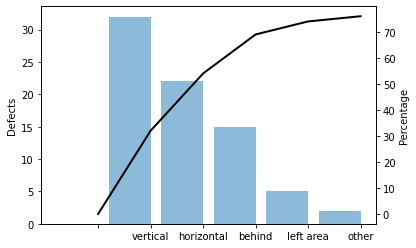

In [40]:
# data
defects = [0, 32, 22, 15, 5, 2]
labels = ['', 'vertical', 'horizontal', 'behind', 'left area', 'other']

# axes
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

# plotting
ax1.bar(np.arange(len(defects))-0.4, defects, zorder=0, alpha=0.5)
ax2.plot(np.cumsum(defects), linestyle='-', color='k', linewidth=2, zorder=5)

# formatting
ax1.set_xticks(np.arange(len(defects)))
ax1.set_xticklabels(labels)
ax1.set_ylabel('Defects')
ax2.set_ylabel('Percentage')
plt.show()

# Graph a pareto chart (FG)

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

#define aesthetics for plot
color1 = 'steelblue'
color2 = 'red'
line_size = 4

#create basic bar plot
fig, ax = plt.subplots()
ax.bar(df_RedDarkRed_FG.index, df_RedDarkRed_FG['Stock_Level'], color=color1)

#add cumulative percentage line to plot
ax2 = ax.twinx()
ax2.plot(df_RedDarkRed_FG.index, df_RedDarkRed_FG['cumperc'], color=color2, marker="D", ms=line_size)
ax2.yaxis.set_major_formatter(PercentFormatter())

#specify axis colors
ax.tick_params(axis='y', colors=color1)
ax2.tick_params(axis='y', colors=color2)

#display Pareto chart
plt.show()

# Find products resulting in 80% of red occurences (SFG)

In [ ]:
pd.set_option('display.max_rows',10)
df_RedDarkRed_SFG = df_RedDarkRed_SFG.loc[(df_RedDarkRed_SFG['cumperc'] <= 80)]
df_RedDarkRed_SFG

# 64 out of 144 products contribute towards 80% of the red zoned issues
# 29 out of 144 products contribute towards 50% of the red zoned issues

In [ ]:
# Export to excel for analysis

# determining the name of the file
file_name = 'A-80% SFG.xlsx'
  
# saving the excel
df_RedDarkRed_SFG.to_excel(file_name)
print('DataFrame is written to Excel File successfully.')

# Find products resulting in 80% of red occurences (FG)

In [ ]:
pd.set_option('display.max_rows',10)
df_RedDarkRed_FG = df_RedDarkRed_FG.loc[(df_RedDarkRed_FG['cumperc'] <= 80)]
df_RedDarkRed_FG

In [ ]:
# Export to excel for analysis

# determining the name of the file
file_name = 'A-80% FG.xlsx'
  
# saving the excel
df_RedDarkRed_FG.to_excel(file_name)
print('DataFrame is written to Excel File successfully.')

# Find top stream resulting in red occurences

In [ ]:

# effect of stream on red zones

df_subset_stream= Stock_Levels_RedDarkRed.groupby(['Stream','Stream_Description'])[["Stock_Level"]].count().reset_index()  # reset_index() makes it back into a dataframe
pd.set_option('display.max_rows',10)

df_subset_stream['%'] =(df_subset_stream['Stock_Level']/(df_subset_stream['Stock_Level'].sum()))*100
# sort in ascending
df_subset_stream = df_subset_stream.sort_values('%',ascending=False)
df_subset_stream

# As can be seen the biggest affected stream are ZA03_EP_EAT (enamel agile pot manufacture) and ZA03_EP_LGP (lean GP)
# And ZA03_EB_EBM (Enamel blend manufacture)


# Hierarchy Level 2 and ABC rating effect on counts of reds

In [ ]:

df_subset_HierarchyL2= Stock_Levels_RedDarkRed.groupby(['FamilyHierarchyL2','ABC'])[["Stock_Level"]].count().reset_index()  # reset_index() makes it back into a dataframe
pd.set_option('display.max_rows',10)

df_subset_HierarchyL2['%'] =(df_subset_HierarchyL2['Stock_Level']/(df_subset_HierarchyL2['Stock_Level'].sum()))*100
# sort in ascending
df_subset_HierarchyL2 = df_subset_HierarchyL2.sort_values('%',ascending=False)
df_subset_HierarchyL2




# Find the FG's that don't have forecasted figures

In [ ]:
pd.set_option('display.max_rows',10)
No_Forecast = df_filter.loc[(df_filter['Forecasted'] == 0)].drop_duplicates(subset=['Code'])
No_Forecast

In [ ]:
# Export to excel for analysis

# determining the name of the file
file_name = 'Forecast_Blank.xlsx'
  
# saving the excel
No_Forecast.to_excel(file_name)
print('DataFrame is written to Excel File successfully.')

# Find which sales category products have the most red occurences

In [ ]:
df_subset_sales= Stock_Levels_RedDarkRed.groupby(['ProductSalesCategory'])[["Stock_Level"]].count().reset_index()  # reset_index() makes it back into a dataframe
pd.set_option('display.max_rows',40)

df_subset_sales['%'] =(df_subset_sales['Stock_Level']/(df_subset_sales['Stock_Level'].sum()))*100
# sort in ascending
df_subset_sales = df_subset_sales.sort_values('%',ascending=False)
df_subset_sales

#speciality, mid-tier and General have the most occurences of red
# does this correlate to erratic sales in these divisions

In [ ]:
# Export to excel for analysis

# determining the name of the file
file_name = 'A-Sales Category.xlsx'
  
# saving the excel
df_subset_sales.to_excel(file_name)
print('DataFrame is written to Excel File successfully.')

In [ ]:
# Bar chart
from itertools import cycle, islice
import matplotlib.pyplot as plot  # import pyplot to draw bar graph
import numpy as np   # import numpy module
my_colors = list(islice(cycle(['b', 'r', 'g', 'y', 'k']), None, len(df)))
df_subset_sales.plot.bar(x='ProductSalesCategory',y='%',rot=0,color = my_colors)
plot.xticks(rotation=30)

# Sales Category with ABC Rating effect on Reds

In [ ]:
df_subset_sales= Stock_Levels_RedDarkRed.groupby(['ProductSalesCategory', 'ABC'])[["Stock_Level"]].count().reset_index()  # reset_index() makes it back into a dataframe
pd.set_option('display.max_rows',40)

df_subset_sales['%'] =(df_subset_sales['Stock_Level']/(df_subset_sales['Stock_Level'].sum()))*100
# sort in ascending
df_subset_sales = df_subset_sales.sort_values('%',ascending=False)
df_subset_sales

#speciality, mid-tier and General have the most occurences of red
# does this correlate to erratic sales in these divisions

In [ ]:
# Export to excel for analysis

# determining the name of the file
file_name = 'A-sales category and ABC.xlsx'
  
# saving the excel
df_subset_sales.to_excel(file_name)
print('DataFrame is written to Excel File successfully.')

In [ ]:
# correlate ABC rating reds and 

In [ ]:
# Bar chart
from itertools import cycle, islice
import matplotlib.pyplot as plot  # import pyplot to draw bar graph
import numpy as np   # import numpy module
my_colors = list(islice(cycle(['b', 'r', 'g', 'y', 'k']), None, len(df)))
df_subset_sales.plot.bar(x='ProductSalesCategory',y='%',rot=0,color = my_colors)
plot.xticks(rotation=30)

# Most Reds per month

In [ ]:
df_subset_sales_month= Stock_Levels_RedDarkRed.groupby(['Month',"Year"])[["Stock_Level"]].count().reset_index()  # reset_index() makes it back into a dataframe
pd.set_option('display.max_rows',None)
df_subset_sales_month = df_subset_sales_month.sort_values(['Stock_Level'],ascending=False)
df_subset_sales_month
# not month dependent


In [ ]:
# Export to excel for analysis

# determining the name of the file
file_name = 'A-Month reds.xlsx'
  
# saving the excel
df_subset_sales_month.to_excel(file_name)
print('DataFrame is written to Excel File successfully.')

In [ ]:
# Bar chart
from itertools import cycle, islice
import matplotlib.pyplot as plot  # import pyplot to draw bar graph
import numpy as np   # import numpy module
my_colors = list(islice(cycle(['b', 'r', 'g', 'y', 'k']), None, len(df)))
df_subset_sales_month.plot.bar(x='Month',y='Stock_Level',rot=0,color = my_colors)
plot.xticks(rotation=30)

# Effect of SFG times on stream reds

In [ ]:
# First you want to remove duplicates SFG's from the original filtered dataframe - one POPK will have many POMN's attached
SFG_Original = df_filter.drop_duplicates(subset=['SFG'])

# Filter only SFG's which are red
SFG_RedDarkRed= SFG_Original.loc[(SFG_Original['Stock_Level'] == "Red")|(SFG_Original['Stock_Level'] == "Dark Red")]

#Then average cycle times per sfg that are reds per stream
df_subset_SFGTime= SFG_RedDarkRed.groupby(['Stream'])[["Sum Times per material"]].mean().reset_index()  # reset_index() makes it back into a dataframe
pd.set_option('display.max_rows',40)


# Then find the % contribution of each stream 
df_subset_SFGTime['%'] =(df_subset_SFGTime['Sum Times per material']/(df_subset_SFGTime['Sum Times per material'].sum()))*100
# sort in ascending
df_subset_SFGTime = df_subset_SFGTime.sort_values('%',ascending=False)
df_subset_SFGTime



# we can see that if you average the cycle times of original products in each stream the streams that have the products
# with highest occurences of reds also have products that give the highest cycle time averages for that stream


In [ ]:
# Export to excel for analysis

# determining the name of the file
file_name = 'A-SFG Times.xlsx'
  
# saving the excel
df_subset_SFGTime.to_excel(file_name)
print('DataFrame is written to Excel File successfully.')

In [ ]:
# Bar chart
from itertools import cycle, islice
import matplotlib.pyplot as plot  # import pyplot to draw bar graph
import numpy as np   # import numpy module
my_colors = list(islice(cycle(['b', 'r', 'g', 'y', 'k']), None, len(df)))
df_subset_SFGTime.plot.bar(x='Stream',y='%',rot=0,color=my_colors)
plot.xticks(rotation=30)

# Effect of packsize on the red zones

In [ ]:

df_subset_packsize = Stock_Levels_RedDarkRed.groupby(['Volume'])[["Stock_Level"]].count().reset_index()  # reset_index() makes it back into a dataframe

pd.set_option('display.max_rows',40)
df_allzonecolors = df_filter.groupby(['Volume'])[["Stock_Level"]].count().reset_index()


#do a left join on first and second dataframe
df_subset_packsize = pd.merge(df_subset_packsize,
                 df_allzonecolors[['Volume','Stock_Level']],   # have to include the key column
                 on='Volume', 
                 how='left')


df_subset_packsize['% Reds'] =(df_subset_packsize['Stock_Level_x']/(df_subset_packsize['Stock_Level_x'].sum()))*100
df_subset_packsize['% Reds per Packsize'] = (df_subset_packsize['Stock_Level_x']/df_subset_packsize['Stock_Level_y'])*100


# stock level x per packsize
# stock level y is sum of all per packsize

# sort in ascending
df_subset_packsize = df_subset_packsize.sort_values('% Reds per Packsize',ascending=False)
df_subset_packsize

# 5,25 and 20 have the most cases of reds
# doesnt seem to be fill rate dependent
# according to factory 500ml, 1, 2L are the slowest fillers



In [ ]:
# Export to excel for analysis

# determining the name of the file
file_name = 'A-Packsize.xlsx'
  
# saving the excel
df_subset_packsize.to_excel(file_name)
print('DataFrame is written to Excel File successfully.')

# Section & Packsize on Red Zone Counts

In [ ]:

df_subset_packsize = Stock_Levels_RedDarkRed.groupby(['Stream','Volume'])[["Stock_Level"]].count().reset_index()  # reset_index() makes it back into a dataframe

pd.set_option('display.max_rows',40)
df_allzonecolors = df_filter.groupby(['Volume'])[["Stock_Level"]].count().reset_index()


#do a left join on first and second dataframe
df_subset_packsize = pd.merge(df_subset_packsize,
                 df_allzonecolors[['Volume','Stock_Level']],   # have to include the key column
                 on='Volume', 
                 how='left')


df_subset_packsize['% Reds'] =(df_subset_packsize['Stock_Level_x']/(df_subset_packsize['Stock_Level_x'].sum()))*100
df_subset_packsize['% Reds per Packsize'] = (df_subset_packsize['Stock_Level_x']/df_subset_packsize['Stock_Level_y'])*100


# stock level x per packsize
# stock level y is sum of all per packsize

# sort in ascending
df_subset_packsize = df_subset_packsize.sort_values('% Reds per Packsize',ascending=False)
df_subset_packsize

# 5,25 and 20 have the most cases of reds
# doesnt seem to be fill rate dependent
# according to factory 500ml, 1, 2L are the slowest fillers

In [ ]:
# Export to excel for analysis

# determining the name of the file
file_name = 'A-Section and Packsize.xlsx'
  
# saving the excel
df_subset_packsize.to_excel(file_name)
print('DataFrame is written to Excel File successfully.')

# Effect of ABC rating on Red Zones

In [ ]:
# what about the effect of ABC rating on red zones

df_subsetABC = Stock_Levels_RedDarkRed.groupby(['ABC'])[['Stock_Level']].count().reset_index()  # reset_index() makes it back into a dataframe
pd.set_option('display.max_rows',None)

df_subsetABC['%2'] =(df_subsetABC['Stock_Level']/df_subsetABC['Stock_Level'].sum())*100
# sort in ascending
df_subsetABC = df_subsetABC.sort_values('%2',ascending=False)
df_subsetABC

# majority in red are C and A strategy products
# A = SKUs contributing to the top 80% of Revenue (Pareto principal)
# B = SKUs contributing to the 80-95 percentile of Revenue (Pareto principal)
# C = SKUs contributing to the 95-100 percentile of Revenue (Pareto principal)
# Y - slow items
# X - New items

# don't think there is a correlation. A, B and C are the highest volumes
# So there will be likely that they have more stock out occurences


# Above forecast evaluation

In [ ]:
# remove duplicate entries - the link up would have duplicated forecasted and actual values relevant to each month
# remove duplicates based on concat column
pd.set_option('display.max_rows',5)
Above_Forecast_Original = df_filter.drop_duplicates(subset=['Concat'])
Above_Forecast_Original = Above_Forecast_Original.sort_values(['Code','Per_Above_Forecast'],ascending=False)
Above_Forecast_Original

# count how many months FG sales above forecast by 20% 

In [ ]:
# filter only those that meet the criteria of being > 20% above forecast
pd.set_option('display.max_rows',10)
Above_Forecast_Original_Xper= Above_Forecast_Original.loc[Above_Forecast_Original['Forecast_Status'] == "Above Forecast by atleast 20%"]

df_subset_Above_Forecast = Above_Forecast_Original_Xper.groupby(['Code','SFG','ABC'])[['Forecast_Status']].count().reset_index()
df_subset_Above_Forecast = df_subset_Above_Forecast.sort_values('Forecast_Status',ascending=False)
df_subset_Above_Forecast

# match this against the reds to see which are the most troublesome

In [ ]:
# Export to excel for analysis

# determining the name of the file
file_name = 'A-sales above forecast 10%.xlsx'
  
# saving the excel
df_subset_Above_Forecast.to_excel(file_name)
print('DataFrame is written to Excel File successfully.')

# count how many months FG sales above forecast by 10% 

In [ ]:
# filter only those that meet the criteria of being > 10% above forecast
pd.set_option('display.max_rows',40)
Above_Forecast_Original_Xper2= Above_Forecast_Original.loc[Above_Forecast_Original['Forecast_Status_2'] == "Above Forecast by atleast 10%"]

df_subset_Above_Forecast2 = Above_Forecast_Original_Xper2.groupby(['Code','SFG','ABC'])[['Forecast_Status_2']].count().reset_index()
df_subset_Above_Forecast2 = df_subset_Above_Forecast2.sort_values('Forecast_Status_2',ascending=False)
df_subset_Above_Forecast2

# match this against the reds to see which are the most troublesome

In [ ]:
# Export to excel for analysis

# determining the name of the file
file_name = 'A-sales above forecast 20%.xlsx'
  
# saving the excel
df_subset_Above_Forecast2.to_excel(file_name)
print('DataFrame is written to Excel File successfully.')

# Count No Replenishment done quantities for FG's in Dark red

In [ ]:
# just dark red filter
Stock_Levels_Dark_Red = df_filter.loc[(df_filter['Stock_Level'] == 'Dark Red')]

SFG_Dark_Red_Not_Replenished= Stock_Levels_Dark_Red.loc[Stock_Levels_Dark_Red['Replenishment_Status'] == "No_Replenishment_In_5_Days"]
df_subset_Replenishment = SFG_Dark_Red_Not_Replenished.groupby(['Code','ABC'])[["Replenishment_Status"]].count().reset_index()
df_subset_Replenishment = df_subset_Replenishment.sort_values('Replenishment_Status',ascending=False)
pd.set_option('display.max_rows',None)
df_subset_Replenishment


# Count No replenishment done quantities for FG's in red

In [ ]:
# Stock_Levels_Red filters out only the stock_levels in red
# This is basically planning not replenishing when plan line shows red dip

SFG_Red_Not_Replenished= Stock_Levels_Red.loc[Stock_Levels_Red['Replenishment_Status'] == "No_Replenishment_In_5_Days"]
df_subset_Replenishment = SFG_Red_Not_Replenished.groupby(['Code','ABC'])[["Replenishment_Status"]].count().reset_index()
df_subset_Replenishment = df_subset_Replenishment.sort_values('Replenishment_Status',ascending=False)
df_subset_Replenishment

In [ ]:
# Export to excel for analysis

# determining the name of the file
file_name = 'A-no planning replenishment done when in Dark red .xlsx'
  
# saving the excel
df_subset_Replenishment.to_excel(file_name)
print('DataFrame is written to Excel File successfully.')

In [ ]:
# Export to excel for analysis

# determining the name of the file
file_name = 'A-no planning replenishment done when in red .xlsx'
  
# saving the excel
df_subset_Replenishment.to_excel(file_name)
print('DataFrame is written to Excel File successfully.')

# No Replenishments done irrespective of stock level

In [ ]:
# This will not only look at no replenishment done for reds but also yellow
# This is basically planning not replenishing when plan line shows red or yellow dip

df_filter_Not_Replenished= df_filter.loc[df_filter['Replenishment_Status'] == "No_Replenishment_In_5_Days"]
df_subset_Replenishment = df_filter_Not_Replenished.groupby(['Code','ABC'])[["Replenishment_Status"]].count().reset_index()
df_subset_Replenishment = df_subset_Replenishment.sort_values('Replenishment_Status',ascending=False)
df_subset_Replenishment


# do for 5 days consecutively


In [ ]:
# Export to excel for analysis

# determining the name of the file
file_name = 'A-no planning replenishment done red yellow .xlsx'
  
# saving the excel
df_subset_Replenishment.to_excel(file_name)
print('DataFrame is written to Excel File successfully.')

# Count Short Replenishment done quantities for FG's in red

In [ ]:
# This is planning not replenishing enough when in the red zone to get back to green


SFG_Red_short_Replenished= Stock_Levels_Red.loc[Stock_Levels_Red['Replenishment_Status_2'] == "Incorrect_Replenishment_Amt"]
df_subset_Replenishment_2 = SFG_Red_short_Replenished.groupby(['SFG'])[["Replenishment_Status_2"]].count().reset_index()
df_subset_Replenishment_2 = df_subset_Replenishment_2.sort_values('Replenishment_Status_2',ascending=False)
df_subset_Replenishment_2

In [ ]:
# this will count all short replenishment even when in yellow zone
# this is planning not replenishing enough when plan line is in yellow or red to get back to green zone

SFG_short_Replenished= df_filter.loc[df_filter['Replenishment_Status_2'] == "Incorrect_Replenishment_Amt"]
df_subset_Replenishment_2 = SFG_short_Replenished.groupby(['SFG'])[["Replenishment_Status_2"]].count().reset_index()
df_subset_Replenishment_2 = df_subset_Replenishment_2.sort_values('Replenishment_Status_2',ascending=False)
df_subset_Replenishment_2

# Determine if there was large consumptions i.e. jumps from green to red or yellow to red (Actual)

In [ ]:
# so this counts occurences when consumption moved stock levels from green to red for specific FG's

pd.set_option('display.max_rows',10)
Overconsumption_Green = df_filter.loc[df_filter['Over_Consumption_Green'] =="Overconsumed_Green"]
GreenToRed = Overconsumption_Green.groupby(['Code','ABC','ProductSalesCategory'])[["Over_Consumption_Green"]].count().reset_index().sort_values('Over_Consumption_Green',ascending=False)


# can also do this exercise with yellow to red

#ABC ratings A,B,C only - only looking at fast movers
GreenToRed_ABC  = GreenToRed.loc[(GreenToRed["ABC"] == "A") | (GreenToRed["ABC"] == "B") | (GreenToRed["ABC"] == "C") ]
GreenToRed_ABC


In [ ]:
# now take the above dataframe and do a count based on productSalesCategory
# This checks the sum of cases where drop from green to red zone per productsalescategory

df_CountProductSalesCategory_OverconsumedGreen = GreenToRed_ABC.groupby(['ProductSalesCategory'])[["Over_Consumption_Green"]].sum().reset_index().sort_values('Over_Consumption_Green',ascending=False)
df_CountProductSalesCategory_TotalProductSalesCategories=df_filter.groupby(['ProductSalesCategory'])[["Code"]].count().reset_index()

#do a left join on first and second dataframe
df_CountProductSalesCategory_OverconsumedGreen = pd.merge(df_CountProductSalesCategory_OverconsumedGreen,
                 df_CountProductSalesCategory_TotalProductSalesCategories[['ProductSalesCategory','Code']],   # have to include the key column
                 on='ProductSalesCategory', 
                 how='left')


# lets work out the percentage of the totals i.e. what percentage for each category was red dips from total occurences
df_CountProductSalesCategory_OverconsumedGreen['% of category which overconsumes'] = ((df_CountProductSalesCategory_OverconsumedGreen['Over_Consumption_Green'])/(df_CountProductSalesCategory_OverconsumedGreen['Code']))*100

df_CountProductSalesCategory_OverconsumedGreen =df_CountProductSalesCategory_OverconsumedGreen.sort_values('% of category which overconsumes',ascending=False)
df_CountProductSalesCategory_OverconsumedGreen

# Top 3 sales categories reds arranged according to ABC rating

In [ ]:
# filter by the top 3 problem sales categories (i.e. reds for general, mid tier and speciality)

TopSalesCategoriesIssues  = Stock_Levels_RedDarkRed.loc[(Stock_Levels_RedDarkRed["ProductSalesCategory"] == "GENERAL") | (Stock_Levels_RedDarkRed["ProductSalesCategory"] == "MID-TIER") | (Stock_Levels_RedDarkRed["ProductSalesCategory"] == "SPECIALITY") ]

# Then do a count of the streams these reds belong to 
SalesCategoriesStreams = TopSalesCategoriesIssues.groupby(['ABC'])['Stock_Level'].count().reset_index()
SalesCategoriesStreams =SalesCategoriesStreams.sort_values('Stock_Level',ascending=False)
SalesCategoriesStreams

# ABC items are related to salescategories which are in reds

# Determine if there was large consumptions i.e. jumps from green to red or yellow to red (Plan)

In [ ]:
# so this will check if the plan line is properly accomodating forecasted figures

pd.set_option('display.max_rows',10)
Overconsumption_GreenP = df_filter.loc[df_filter["Plan_OverConsumption"] == "Overconsumed_Green_Plan"]
GreenToRedPlan = Overconsumption_GreenP.groupby(['Code','ABC'])[["Plan_OverConsumption"]].count().reset_index().sort_values('Plan_OverConsumption',ascending=False)

#ABC ratings A,B,C only - only looking at fast movers
GreenToRedPlan_ABC  = GreenToRedPlan.loc[(GreenToRedPlan["ABC"] == "A") | (GreenToRedPlan["ABC"] == "B") | (GreenToRedPlan["ABC"] == "C") ]
GreenToRedPlan_ABC


# Determine if production is making in the red zone

In [ ]:
# want to see if there is a significant spike so filter all delta above threshold (2 pallets)
Spikes_Above_Threshold = df_filter.loc[df_filter['Delta_ATP'] > (df_filter['Pallet']*2)]
Spikes_Above_Threshold

# Now do a filter on the spike_above_threshold to filter only those FG's that have an intial stock level state of Red which means that it was red when production started producing
Spikes_Above_Threshold_Red = Spikes_Above_Threshold.loc[Spikes_Above_Threshold['initial_Stock_Level_State'] == "Red"]
Spikes_Above_Threshold_Red

# Now do a count based on FG's
Production_Makes_At_Red = Spikes_Above_Threshold_Red.groupby(['Code','ABC'])[["initial_Stock_Level_State"]].count().reset_index().sort_values('initial_Stock_Level_State',ascending=False)

#ABC ratings A,B,C only - only looking at fast movers
Production_Makes_At_Red_ABC  = Production_Makes_At_Red.loc[(Production_Makes_At_Red["ABC"] == "A") | (Production_Makes_At_Red["ABC"] == "B") | (Production_Makes_At_Red["ABC"] == "C") ]
Production_Makes_At_Red_ABC


# Determine if production is making in the dark red zone

In [ ]:
# want to see if there is a significant spike so filter all delta above threshold
Spikes_Above_Threshold = df_filter.loc[df_filter['Delta_ATP'] > (df_filter['Pallet']*2)]
Spikes_Above_Threshold

# Now do a filter on the spike_above_threshold to filter only those FG's that have an intial stock level state of darkRed which means that it was dark red when production started producing
Spikes_Above_Threshold_DarkRed = Spikes_Above_Threshold.loc[Spikes_Above_Threshold['initial_Stock_Level_State'] == "Dark Red"]
Spikes_Above_Threshold_DarkRed

# Now do a count based on FG's
Production_Makes_At_DarkRed = Spikes_Above_Threshold_DarkRed.groupby(['Code','ABC'])[["initial_Stock_Level_State"]].count().reset_index().sort_values('initial_Stock_Level_State',ascending=False)


#ABC ratings A,B,C only - only looking at fast movers
Production_Makes_At_DarkRed_ABC  = Production_Makes_At_DarkRed.loc[(Production_Makes_At_DarkRed["ABC"] == "A") | (Production_Makes_At_DarkRed["ABC"] == "B") | (Production_Makes_At_DarkRed["ABC"] == "C") ]
Production_Makes_At_DarkRed_ABC


# Determine if production is making in the yellow zone

In [ ]:
# want to see if there is a significant spike so filter all delta above threshold
Spikes_Above_Threshold = df_filter.loc[df_filter['Delta_ATP'] > (df_filter['Pallet']*2)]
Spikes_Above_Threshold

# Now do a filter on the spike_above_threshold to filter only those FG's that have an intial stock level state of yellow which means that it was yellow when production started producing
Spikes_Above_Threshold_Yellow = Spikes_Above_Threshold.loc[Spikes_Above_Threshold['initial_Stock_Level_State'] == "Yellow"]


# Now do a count based on FG's
Production_Makes_At_Yellow = Spikes_Above_Threshold_Yellow.groupby(['Code','ABC'])[["initial_Stock_Level_State"]].count().reset_index().sort_values('initial_Stock_Level_State',ascending=False)


#ABC ratings A,B,C only - only looking at fast movers
Production_Makes_At_Yellow_ABC  = Production_Makes_At_Yellow.loc[(Production_Makes_At_Yellow["ABC"] == "A") | (Production_Makes_At_Yellow["ABC"] == "B") | (Production_Makes_At_Yellow["ABC"] == "C") ]
Production_Makes_At_Yellow_ABC

# Production Summary (Yellow, Red, Dark Red) Percentages

In [ ]:
# for each of the top 80% issue SFG's what % is planned in yellow, red, dark red, green

TotalOccurencesPerFG = df_filter.groupby(['Code'])[["Stock_Level"]].count().reset_index()

# need a reference table with all the FG's so that it doesn't leave anything out. Can't use the yellow table
df_fg_Production = df_filter['Code'].drop_duplicates()


# first join df with yellow
df_fg_Production = pd.merge(df_fg_Production,
                 Production_Makes_At_Yellow_ABC[['Code','initial_Stock_Level_State']],   # have to include the key column
                 on='Code', 
                 how='left')



# first join yellow with red
df_fg_Production = pd.merge(df_fg_Production,
                 Production_Makes_At_Red_ABC[['Code','initial_Stock_Level_State']],   # have to include the key column
                 on='Code', 
                 how='left')

# Then join yellow with dark red
df_fg_Production = pd.merge(df_fg_Production,
                 Production_Makes_At_DarkRed_ABC[['Code','initial_Stock_Level_State']],   # have to include the key column
                 on='Code', 
                 how='left')

# Then join to table showing total occurences
df_fg_Production = pd.merge(df_fg_Production,
                TotalOccurencesPerFG[['Code','Stock_Level']],   # have to include the key column
                 on='Code', 
                 how='left')


df_fg_Production.rename(columns = {'initial_Stock_Level_State_x':'Making in Yellow'}, inplace = True)
df_fg_Production.rename(columns = {'initial_Stock_Level_State_y':'Making in Red'}, inplace = True)
df_fg_Production.rename(columns = {'initial_Stock_Level_State':'Making in Dark Red'}, inplace = True)
df_fg_Production.rename(columns = {'Stock_Level':'Total Events'}, inplace = True)


df_fg_Production['% Making in Yellow'] = round(((df_fg_Production['Making in Yellow'])/(df_fg_Production['Total Events']))*100,1)
df_fg_Production['% Making in Red'] = round(((df_fg_Production['Making in Red'])/(df_fg_Production['Total Events']))*100,1)
df_fg_Production['% Making in Dark Red'] = round(((df_fg_Production['Making in Dark Red'])/(df_fg_Production['Total Events']))*100,1)

df_fg_Production = df_fg_Production.sort_values('% Making in Dark Red',ascending=False)
df_fg_Production

In [ ]:
# Export to excel for analysis

# determining the name of the file
file_name = 'A-production summary making .xlsx'
  
# saving the excel
df_fg_Production.to_excel(file_name)
print('DataFrame is written to Excel File successfully.')

# Determine if planning is planning in Red 

In [ ]:
# want to see if there is a significant spike so filter all delta above threshold
Spikes_Above_Threshold_Plan = df_filter.loc[df_filter['Delta_ATP_Plan'] > (df_filter['Pallet']*2)]
Spikes_Above_Threshold_Plan

# Now do a filter on the spike_above_threshold to filter only those FG's that have an intial stock level state plan of Red which means that it was red when planning started planning
Spikes_Above_Threshold_Red_Plan = Spikes_Above_Threshold_Plan.loc[Spikes_Above_Threshold_Plan['initial_Stock_Level_State_Plan'] == "Red"]
Spikes_Above_Threshold_Red_Plan

# Now do a count based on FG's
Production_Makes_At_Red_Plan = Spikes_Above_Threshold_Red_Plan.groupby(['Code','ABC'])[["initial_Stock_Level_State_Plan"]].count().reset_index().sort_values('initial_Stock_Level_State_Plan',ascending=False)


#ABC ratings A,B,C only - only looking at fast movers
Production_Makes_At_Red_Plan_ABC  = Production_Makes_At_Red_Plan.loc[(Production_Makes_At_Red_Plan["ABC"] == "A") | (Production_Makes_At_Red_Plan["ABC"] == "B") | (Production_Makes_At_Red_Plan["ABC"] == "C") ]

Production_Makes_At_Red_Plan_ABC


# Determine if planning is planning in Dark Red

In [ ]:
# want to see if there is a significant spike so filter all delta above threshold
Spikes_Above_Threshold_Plan = df_filter.loc[df_filter['Delta_ATP_Plan'] > (df_filter['Pallet']*2)]
Spikes_Above_Threshold_Plan

# Now do a filter on the spike_above_threshold to filter only those FG's that have an intial stock level state of dark Red which means that it was dark red when planning started planning
Spikes_Above_Threshold_DarkRed_Plan = Spikes_Above_Threshold_Plan.loc[Spikes_Above_Threshold_Plan['initial_Stock_Level_State_Plan'] == "Dark Red"]
Spikes_Above_Threshold_DarkRed_Plan

# Now do a count based on FG's
Production_Makes_At_DarkRed_Plan = Spikes_Above_Threshold_DarkRed_Plan.groupby(['Code','ABC'])[["initial_Stock_Level_State_Plan"]].count().reset_index().sort_values('initial_Stock_Level_State_Plan',ascending=False)

#ABC ratings A,B,C only - only looking at fast movers
Production_Makes_At_DarkRed_Plan_ABC  = Production_Makes_At_DarkRed_Plan.loc[(Production_Makes_At_DarkRed_Plan["ABC"] == "A") | (Production_Makes_At_DarkRed_Plan["ABC"] == "B") | (Production_Makes_At_DarkRed_Plan["ABC"] == "C") ]
Production_Makes_At_DarkRed_Plan_ABC 

# Determine if planning is planning in Yellow

In [ ]:
# want to see if there is a significant spike so filter all delta above threshold
Spikes_Above_Threshold_Plan = df_filter.loc[df_filter['Delta_ATP_Plan'] > (df_filter['Pallet']*2)]
Spikes_Above_Threshold_Plan

# Now do a filter on the spike_above_threshold to filter only those FG's that have an intial stock level state of yellow which means that it was yellow when planning started planning
Spikes_Above_Threshold_Yellow_Plan = Spikes_Above_Threshold_Plan.loc[Spikes_Above_Threshold_Plan['initial_Stock_Level_State_Plan'] == "Yellow"]
Spikes_Above_Threshold_Yellow_Plan

# Now do a count based on FG's
Production_Makes_At_Yellow_Plan = Spikes_Above_Threshold_Yellow_Plan.groupby(['Code','ABC'])[["initial_Stock_Level_State_Plan"]].count().reset_index().sort_values('initial_Stock_Level_State_Plan',ascending=False)

#ABC ratings A,B,C only - only looking at fast movers
Production_Makes_At_Yellow_Plan_ABC  = Production_Makes_At_Yellow_Plan.loc[(Production_Makes_At_Yellow_Plan["ABC"] == "A") | (Production_Makes_At_Yellow_Plan["ABC"] == "B") | (Production_Makes_At_Yellow_Plan["ABC"] == "C") ]
Production_Makes_At_Yellow_Plan_ABC 

# Planning Summary (Yellow, Red, Dark Red) Percentages

In [ ]:
# for each of the top 80% issue SFG's what % is planned in yellow, red, dark red, green
pd.set_option('display.max_rows',10)
TotalOccurencesPerFG_Plan = df_filter.groupby(['Code'])[["Stock_Level_Plan"]].count().reset_index()

# need a reference table with all the FG's so that it doesn't leave anything out. Can't use the yellow table
df_fg = df_filter[['Code','ABC']].drop_duplicates()




# first join yellow with df_fg
df_fg = pd.merge(df_fg,
                 Production_Makes_At_Yellow_Plan_ABC[['Code','initial_Stock_Level_State_Plan']],   # have to include the key column
                 on='Code', 
                 how='left')




# Join red
df_fg = pd.merge(df_fg,
                 Production_Makes_At_Red_Plan_ABC[['Code','initial_Stock_Level_State_Plan']],   # have to include the key column
                 on='Code', 
                 how='left')

# Then join dark red
df_fg = pd.merge(df_fg,
                 Production_Makes_At_DarkRed_Plan_ABC[['Code','initial_Stock_Level_State_Plan']],   # have to include the key column
                 on='Code', 
                 how='left')

# Then join to table showing total occurences
df_fg = pd.merge(df_fg,
                TotalOccurencesPerFG_Plan[['Code','Stock_Level_Plan']],   # have to include the key column
                 on='Code', 
                 how='left')


df_fg.rename(columns = {'initial_Stock_Level_State_Plan_x':'Planning in Yellow'}, inplace = True)
df_fg.rename(columns = {'initial_Stock_Level_State_Plan_y':'Planning in Red'}, inplace = True)
df_fg.rename(columns = {'initial_Stock_Level_State_Plan':'Planning in Dark Red'}, inplace = True)
df_fg.rename(columns = {'Stock_Level_Plan':'Total Events'}, inplace = True)


df_fg['% Planning in Yellow'] = round(((df_fg['Planning in Yellow'])/(df_fg['Total Events']))*100,1)
df_fg['% Planning in Red'] = round(((df_fg['Planning in Red'])/(df_fg['Total Events']))*100,1)
df_fg['% Planning in Dark Red'] = round(((df_fg['Planning in Dark Red'])/(df_fg['Total Events']))*100,1)

df_fg = df_fg.sort_values('% Planning in Dark Red',ascending=False)
df_fg



In [ ]:
# Export to excel for analysis

# determining the name of the file
file_name = 'A-planning summary.xlsx'
  
# saving the excel
df_fg.to_excel(file_name)
print('DataFrame is written to Excel File successfully.')

# Overall Summary of Issues Contributing to Reds

In [ ]:
# Refer to excel spreadsheet